# Data Visualization for Exploration
## Practical Examples with Matplotlib and Seaborn

## Setup
Import required libraries and configure display settings

In [12]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Display settings
warnings.filterwarnings('ignore')
%matplotlib inline

# Set default figure size
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Seaborn style
sns.set_theme(style='whitegrid', palette='deep')

print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Matplotlib version: 3.9.2
Seaborn version: 0.13.2
Pandas version: 2.3.1
NumPy version: 2.0.2


## Creating Sample Datasets

Let's create realistic datasets for our examples

In [13]:
# Set random seed for reproducibility
np.random.seed(42)

# Create sales dataset
n_records = 500
cities = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Salvador', 'Brasília']
products = ['Laptop', 'Smartphone', 'Tablet', 'Desktop', 'Monitor']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

df_sales = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=n_records, freq='D'),
    'City': np.random.choice(cities, n_records),
    'Product': np.random.choice(products, n_records),
    'Sales': np.random.gamma(2, 1000, n_records),  # Right-skewed distribution
    'Quantity': np.random.randint(1, 20, n_records),
    'Cost': np.random.gamma(1.5, 800, n_records)
})

# Add some derived columns
df_sales['Profit'] = df_sales['Sales'] - df_sales['Cost']
df_sales['Month'] = df_sales['Date'].dt.month_name()
df_sales['Quarter'] = df_sales['Date'].dt.quarter
df_sales['DayOfWeek'] = df_sales['Date'].dt.day_name()

# Add some outliers
outlier_indices = np.random.choice(df_sales.index, 10, replace=False)
df_sales.loc[outlier_indices, 'Sales'] = df_sales.loc[outlier_indices, 'Sales'] * 3

print(f"Created sales dataset with {len(df_sales)} records")
print("\nFirst few rows:")
df_sales.head()

Created sales dataset with 500 records

First few rows:


,Date,City,Product,Sales,Quantity,Cost,Profit,Month,Quarter,DayOfWeek
0,2024-01-01,Salvador,Desktop,1811.921371,18,722.002802,1089.918569,January,1,Monday
1,2024-01-02,Brasília,Laptop,2790.173792,17,2800.665135,-10.491343,January,1,Tuesday
2,2024-01-03,Belo Horizonte,Monitor,840.281641,15,78.721306,761.560334,January,1,Wednesday
3,2024-01-04,Brasília,Tablet,2352.430393,11,453.349914,1899.080479,January,1,Thursday
4,2024-01-05,Brasília,Tablet,4685.557345,13,3083.325166,1602.232179,January,1,Friday


In [14]:
# Quick overview of the data
print("Dataset Info:")
df_sales.info()
print("\nSummary Statistics:")
df_sales.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       500 non-null    datetime64[ns]
 1   City       500 non-null    object        
 2   Product    500 non-null    object        
 3   Sales      500 non-null    float64       
 4   Quantity   500 non-null    int64         
 5   Cost       500 non-null    float64       
 6   Profit     500 non-null    float64       
 7   Month      500 non-null    object        
 8   Quarter    500 non-null    int32         
 9   DayOfWeek  500 non-null    object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(4)
memory usage: 37.2+ KB

Summary Statistics:


,Date,Sales,Quantity,Cost,Profit,Quarter
count,500,500.000000,500.0000,500.000000,500.000000,500.000000
mean,2024-09-06 12:00:00,2166.906610,9.9620,1197.118120,883.162474,2.190000
min,2024-01-01 00:00:00,60.438827,1.0000,4.704333,-6021.937761,1.000000
25%,2024-05-04 18:00:00,1032.984781,5.0000,472.066320,-139.322138,1.000000
50%,2024-09-06 12:00:00,1771.189579,10.0000,940.540687,680.280950,2.000000
75%,2025-01-09 06:00:00,2779.024964,15.0000,1643.131522,1744.954411,3.000000
max,2025-05-14 00:00:00,18233.445252,19.0000,6866.787769,6997.433036,4.000000
std,NaN,1706.929194,5.4813,965.253024,1755.583935,1.117317


---
# Part 1: Why Visualization Matters

## Anscombe's Quartet

Four datasets with identical statistical properties but very different distributions

In [15]:
# Load Anscombe's quartet (built into seaborn)
anscombe = sns.load_dataset('anscombe')

# Show statistical properties
print("Statistical properties for each dataset:")
for dataset in ['I', 'II', 'III', 'IV']:
    data = anscombe[anscombe['dataset'] == dataset]
    print(f"\nDataset {dataset}:")
    print(f"  Mean X: {data['x'].mean():.2f}")
    print(f"  Mean Y: {data['y'].mean():.2f}")
    print(f"  Std X: {data['x'].std():.2f}")
    print(f"  Std Y: {data['y'].std():.2f}")
    print(f"  Correlation: {data['x'].corr(data['y']):.3f}")

Statistical properties for each dataset:

Dataset I:
  Mean X: 9.00
  Mean Y: 7.50
  Std X: 3.32
  Std Y: 2.03
  Correlation: 0.816

Dataset II:
  Mean X: 9.00
  Mean Y: 7.50
  Std X: 3.32
  Std Y: 2.03
  Correlation: 0.816

Dataset III:
  Mean X: 9.00
  Mean Y: 7.50
  Std X: 3.32
  Std Y: 2.03
  Correlation: 0.816

Dataset IV:
  Mean X: 9.00
  Mean Y: 7.50
  Std X: 3.32
  Std Y: 2.03
  Correlation: 0.817


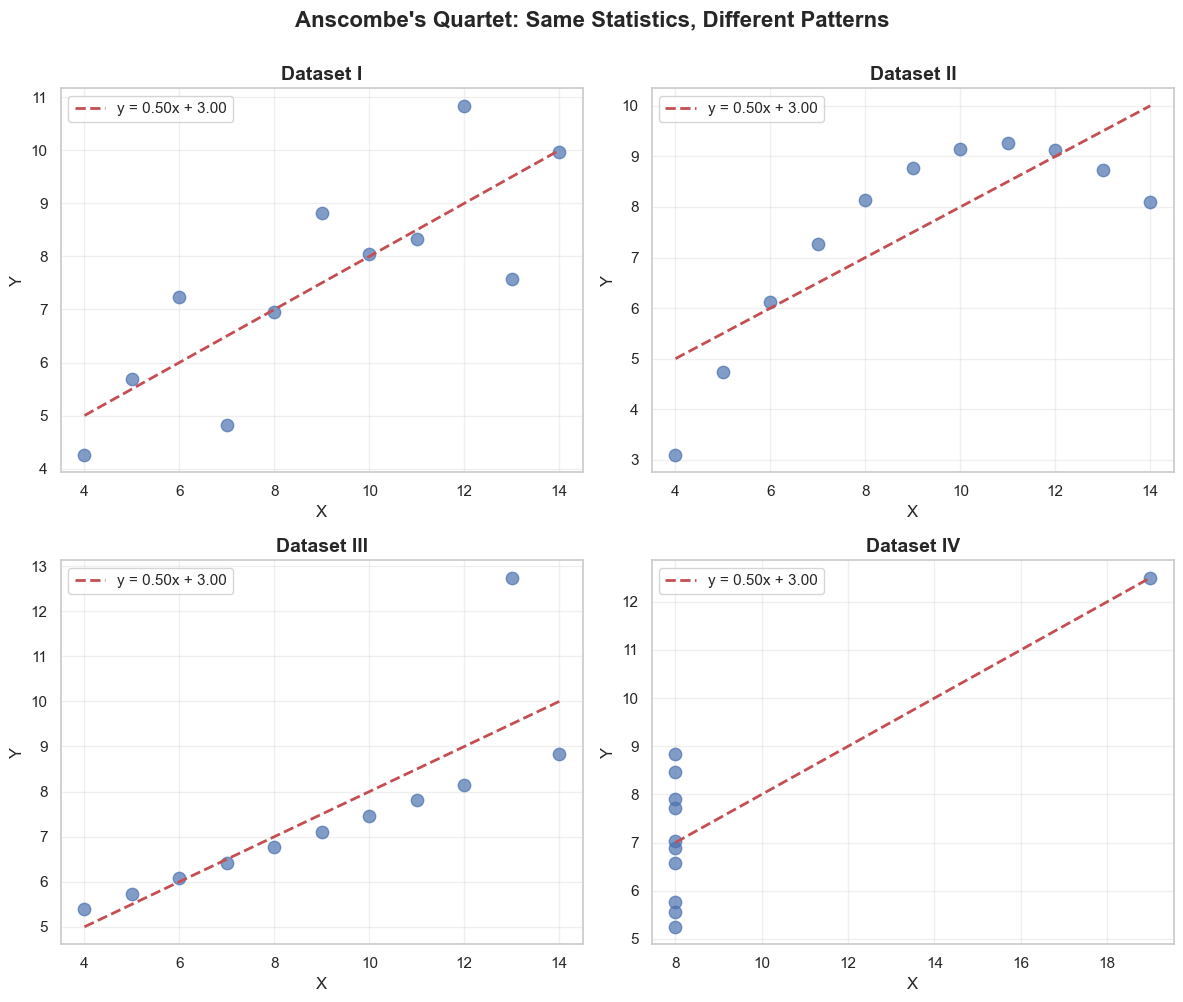


⭐ Lesson: Always visualize your data! Statistics alone can be misleading.


In [16]:
# Visualize Anscombe's quartet
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
datasets = ['I', 'II', 'III', 'IV']

for i, (ax, dataset) in enumerate(zip(axes.flat, datasets)):
    data = anscombe[anscombe['dataset'] == dataset]
    ax.scatter(data['x'], data['y'], s=80, alpha=0.7)
    
    # Add regression line
    m, b = np.polyfit(data['x'], data['y'], 1)
    x_line = np.array([data['x'].min(), data['x'].max()])
    ax.plot(x_line, m * x_line + b, 'r--', lw=2, label=f'y = {m:.2f}x + {b:.2f}')
    
    ax.set_title(f'Dataset {dataset}', fontsize=14, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle("Anscombe's Quartet: Same Statistics, Different Patterns", 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n⭐ Lesson: Always visualize your data! Statistics alone can be misleading.")

---
# Part 2: Matplotlib Basics

## Understanding the Figure and Axes

MATLAB-style plotting:


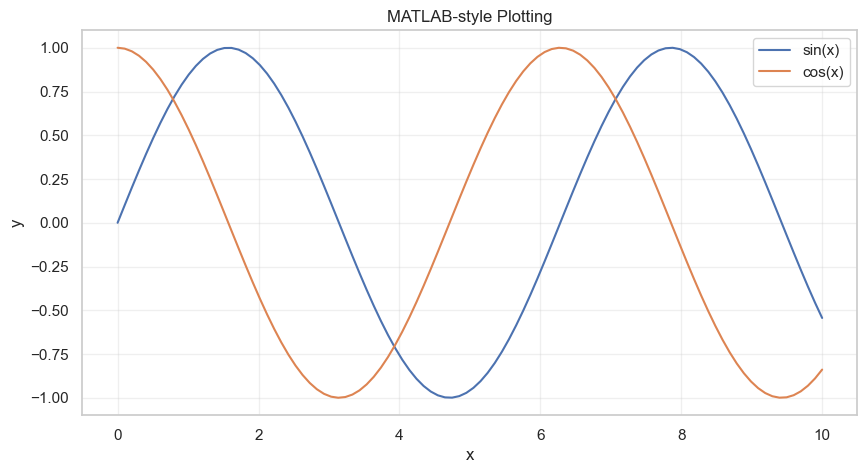

In [17]:
# MATLAB-style (pyplot interface)
print("MATLAB-style plotting:")
x = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MATLAB-style Plotting')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Object-Oriented plotting:


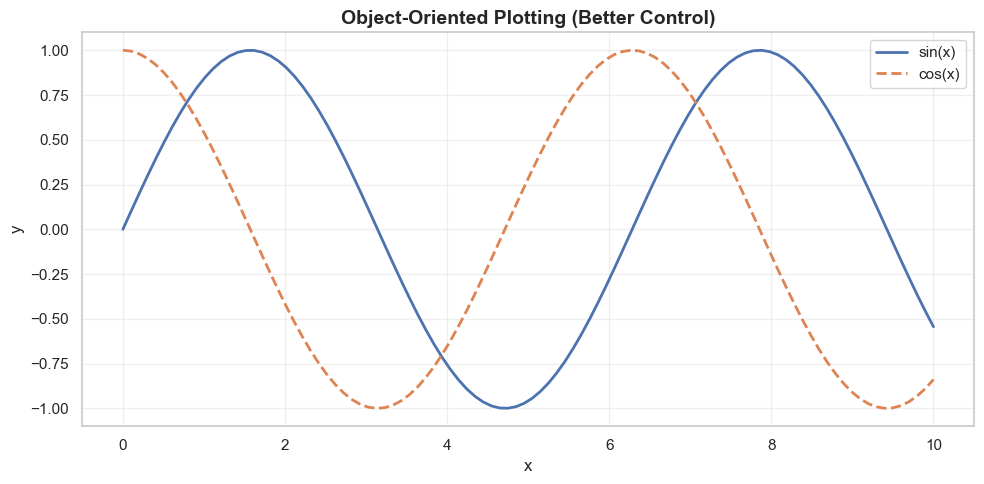


✓ OO style gives more control and is better for complex plots


In [18]:
# Object-Oriented style (recommended)
print("Object-Oriented plotting:")

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, np.sin(x), label='sin(x)', linewidth=2)
ax.plot(x, np.cos(x), label='cos(x)', linewidth=2, linestyle='--')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Object-Oriented Plotting (Better Control)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ OO style gives more control and is better for complex plots")

## Creating Subplots

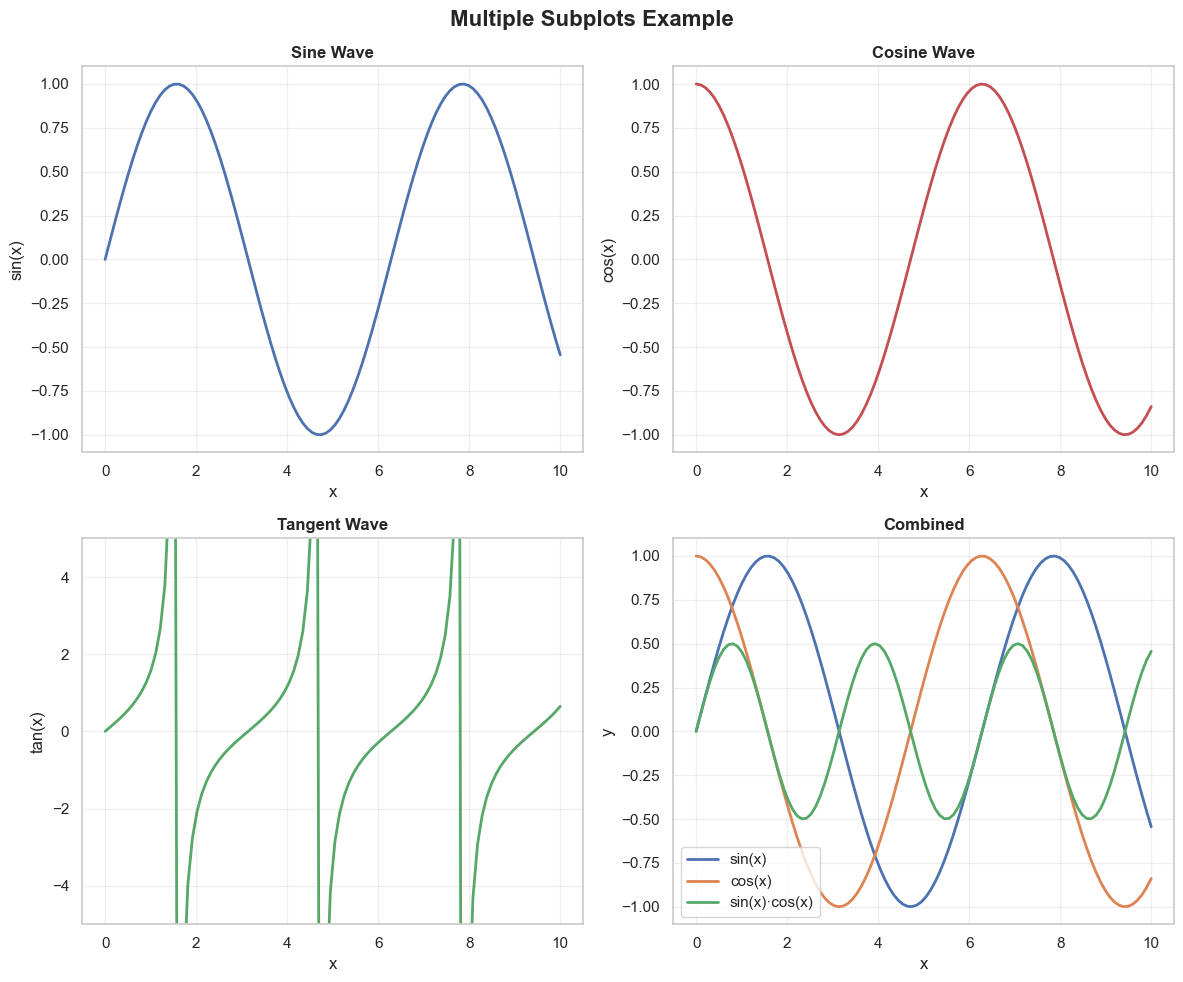

In [19]:
# Create multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Top-left: Sine
axes[0, 0].plot(x, np.sin(x), 'b-', linewidth=2)
axes[0, 0].set_title('Sine Wave', fontweight='bold')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('sin(x)')
axes[0, 0].grid(True, alpha=0.3)

# Top-right: Cosine
axes[0, 1].plot(x, np.cos(x), 'r-', linewidth=2)
axes[0, 1].set_title('Cosine Wave', fontweight='bold')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('cos(x)')
axes[0, 1].grid(True, alpha=0.3)

# Bottom-left: Tangent
axes[1, 0].plot(x, np.tan(x), 'g-', linewidth=2)
axes[1, 0].set_title('Tangent Wave', fontweight='bold')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('tan(x)')
axes[1, 0].set_ylim(-5, 5)  # Limit y-axis
axes[1, 0].grid(True, alpha=0.3)

# Bottom-right: Multiple functions
axes[1, 1].plot(x, np.sin(x), label='sin(x)', linewidth=2)
axes[1, 1].plot(x, np.cos(x), label='cos(x)', linewidth=2)
axes[1, 1].plot(x, np.sin(x) * np.cos(x), label='sin(x)·cos(x)', linewidth=2)
axes[1, 1].set_title('Combined', fontweight='bold')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Multiple Subplots Example', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
# Part 3: Chart Types for Different Questions

## 1. Comparing Quantities - Bar Charts

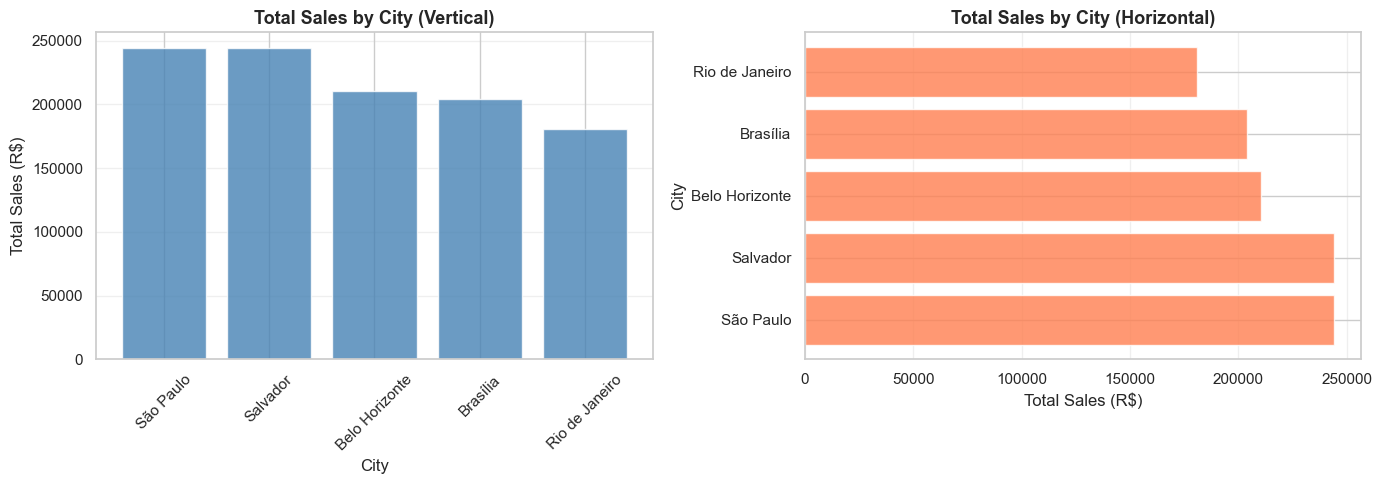

✓ Bar charts are best for comparing quantities across categories
✓ Always start Y-axis at zero for bar charts!
✓ Order by value (descending) unless natural order exists


In [20]:
# Sales by city
city_sales = df_sales.groupby('City')['Sales'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Vertical bar chart
axes[0].bar(city_sales.index, city_sales.values, color='steelblue', alpha=0.8)
axes[0].set_title('Total Sales by City (Vertical)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Total Sales (R$)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Horizontal bar chart (often better for readability)
axes[1].barh(city_sales.index, city_sales.values, color='coral', alpha=0.8)
axes[1].set_title('Total Sales by City (Horizontal)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Total Sales (R$)')
axes[1].set_ylabel('City')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Bar charts are best for comparing quantities across categories")
print("✓ Always start Y-axis at zero for bar charts!")
print("✓ Order by value (descending) unless natural order exists")

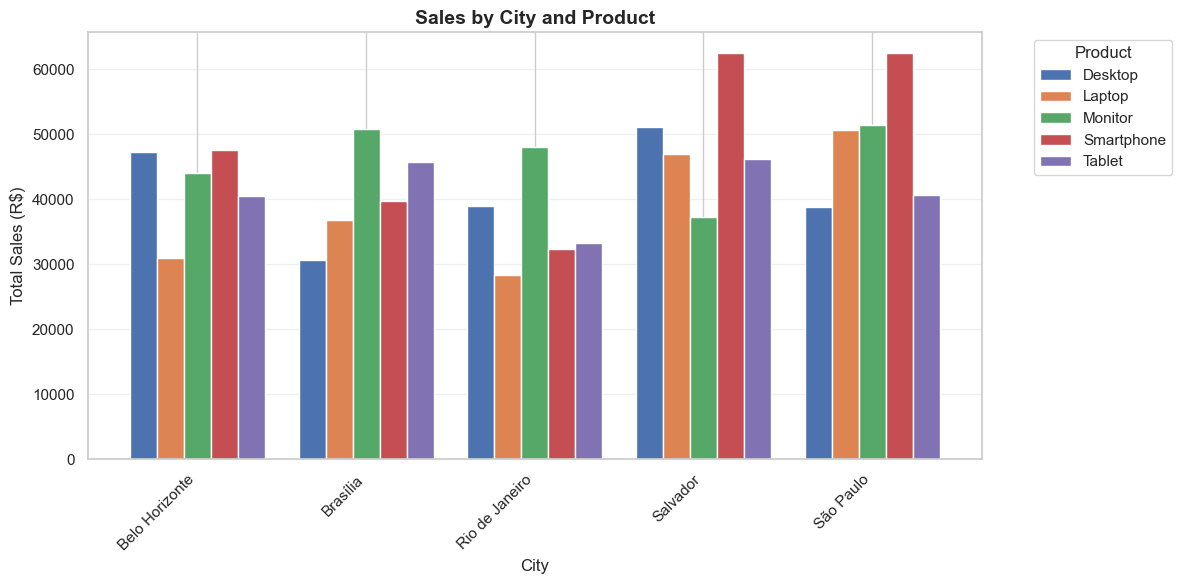

In [21]:
# Grouped bar chart - comparing multiple categories
city_product_sales = df_sales.groupby(['City', 'Product'])['Sales'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
city_product_sales.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Sales by City and Product', fontsize=14, fontweight='bold')
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Total Sales (R$)', fontsize=12)
ax.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2. Distributions - Histograms, Box Plots, Violin Plots

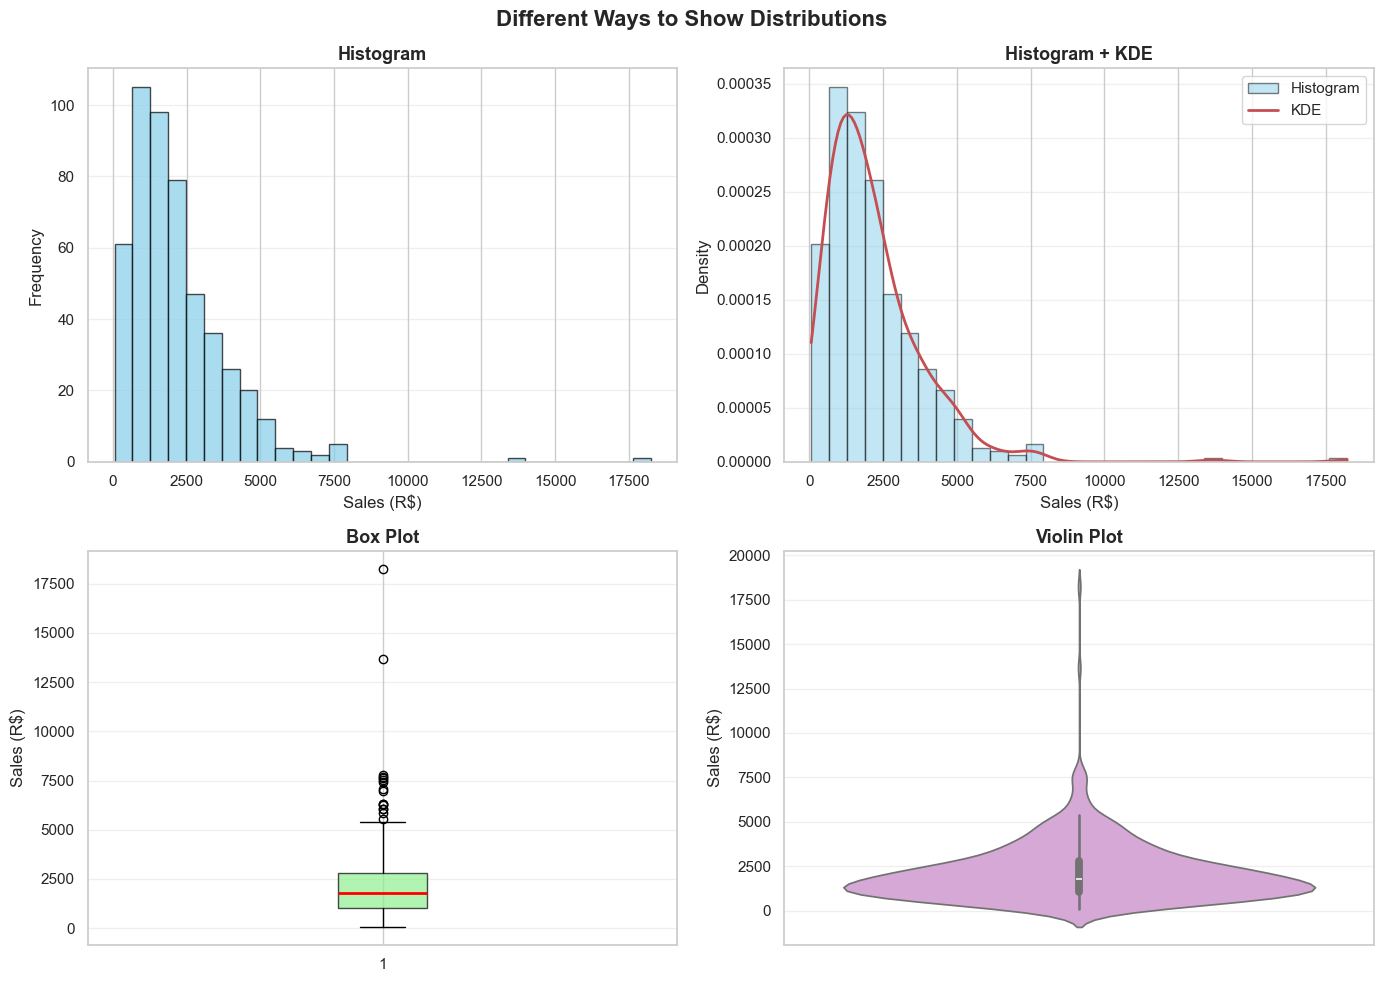


📊 Distribution Insights:
Mean: R$ 2166.91
Median: R$ 1771.19
Std Dev: R$ 1706.93
Skewness: 3.00 (right-skewed distribution)


In [22]:
# Compare different distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(df_sales['Sales'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Histogram', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Sales (R$)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

# Histogram with KDE
axes[0, 1].hist(df_sales['Sales'], bins=30, density=True, color='skyblue', 
                edgecolor='black', alpha=0.5, label='Histogram')
# Add KDE
from scipy import stats
kde = stats.gaussian_kde(df_sales['Sales'])
x_kde = np.linspace(df_sales['Sales'].min(), df_sales['Sales'].max(), 200)
axes[0, 1].plot(x_kde, kde(x_kde), 'r-', linewidth=2, label='KDE')
axes[0, 1].set_title('Histogram + KDE', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Sales (R$)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Box plot
axes[1, 0].boxplot(df_sales['Sales'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_title('Box Plot', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Sales (R$)')
axes[1, 0].grid(axis='y', alpha=0.3)

# Violin plot (using seaborn)
sns.violinplot(data=df_sales, y='Sales', ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Violin Plot', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Sales (R$)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('Different Ways to Show Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Distribution Insights:")
print(f"Mean: R$ {df_sales['Sales'].mean():.2f}")
print(f"Median: R$ {df_sales['Sales'].median():.2f}")
print(f"Std Dev: R$ {df_sales['Sales'].std():.2f}")
print(f"Skewness: {df_sales['Sales'].skew():.2f} (right-skewed distribution)")

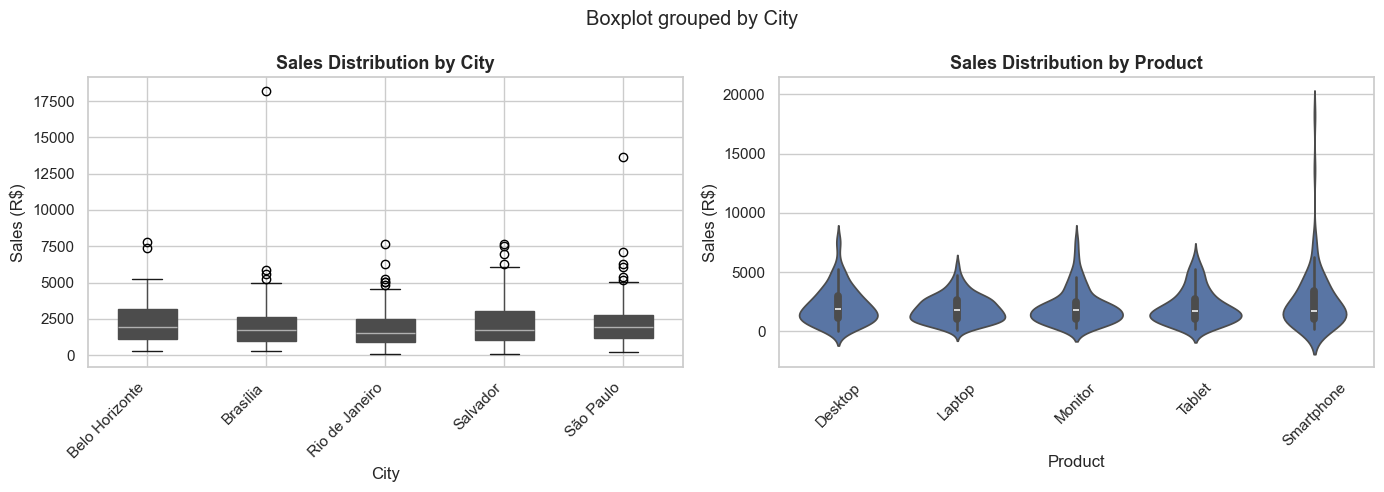

✓ Box plots: good for comparing multiple distributions side-by-side
✓ Violin plots: show both distribution shape and summary statistics


In [23]:
# Comparing distributions across groups
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plots by city
df_sales.boxplot(column='Sales', by='City', ax=axes[0], patch_artist=True)
axes[0].set_title('Sales Distribution by City', fontsize=13, fontweight='bold')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Sales (R$)')
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')

# Violin plots by product
sns.violinplot(data=df_sales, x='Product', y='Sales', ax=axes[1])
axes[1].set_title('Sales Distribution by Product', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Sales (R$)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✓ Box plots: good for comparing multiple distributions side-by-side")
print("✓ Violin plots: show both distribution shape and summary statistics")

## 3. Relationships - Scatter Plots

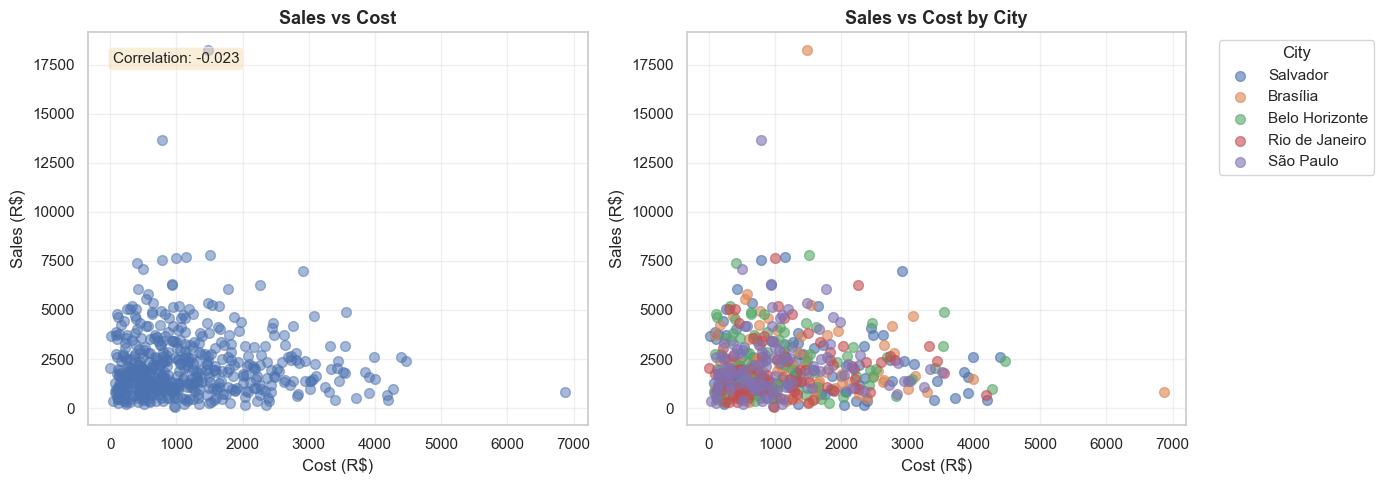

✓ Scatter plots show relationships between two continuous variables
✓ Use color or size to add a third dimension
✓ Add transparency (alpha) when points overlap


In [24]:
# Scatter plot: Sales vs Cost
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Basic scatter
axes[0].scatter(df_sales['Cost'], df_sales['Sales'], alpha=0.5, s=50)
axes[0].set_title('Sales vs Cost', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Cost (R$)')
axes[0].set_ylabel('Sales (R$)')
axes[0].grid(True, alpha=0.3)

# Add correlation
correlation = df_sales['Cost'].corr(df_sales['Sales'])
axes[0].text(0.05, 0.95, f'Correlation: {correlation:.3f}',
             transform=axes[0].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Scatter with color by category
for city in df_sales['City'].unique():
    data = df_sales[df_sales['City'] == city]
    axes[1].scatter(data['Cost'], data['Sales'], label=city, alpha=0.6, s=50)

axes[1].set_title('Sales vs Cost by City', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Cost (R$)')
axes[1].set_ylabel('Sales (R$)')
axes[1].legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Scatter plots show relationships between two continuous variables")
print("✓ Use color or size to add a third dimension")
print("✓ Add transparency (alpha) when points overlap")

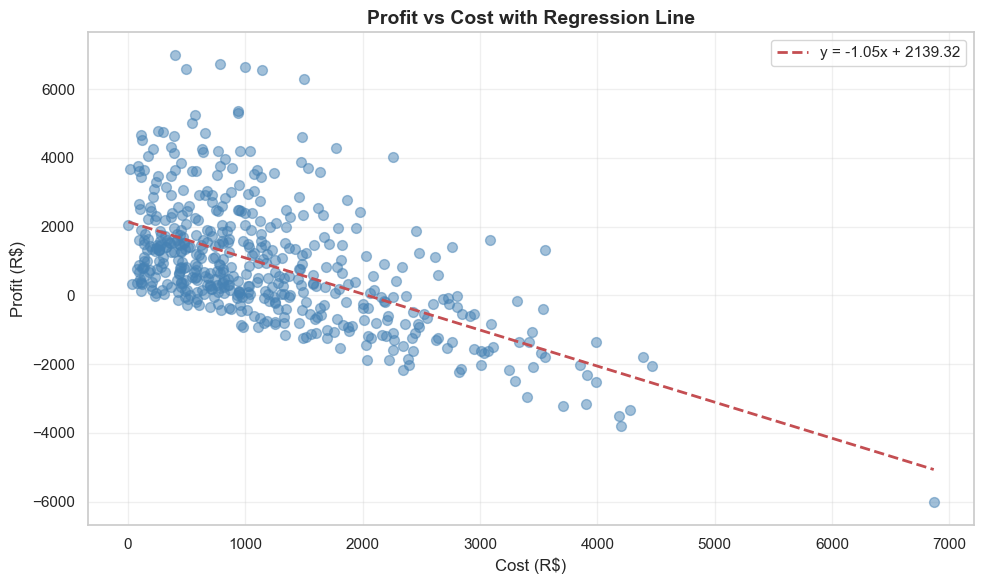


Correlation coefficient: -0.577


In [25]:
# Scatter plot with regression line
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
ax.scatter(df_sales['Cost'], df_sales['Profit'], alpha=0.5, s=50, color='steelblue')

# Add regression line
z = np.polyfit(df_sales['Cost'], df_sales['Profit'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_sales['Cost'].min(), df_sales['Cost'].max(), 100)
ax.plot(x_line, p(x_line), 'r--', linewidth=2, label=f'y = {z[0]:.2f}x + {z[1]:.2f}')

ax.set_title('Profit vs Cost with Regression Line', fontsize=14, fontweight='bold')
ax.set_xlabel('Cost (R$)', fontsize=12)
ax.set_ylabel('Profit (R$)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

correlation = df_sales['Cost'].corr(df_sales['Profit'])
print(f"\nCorrelation coefficient: {correlation:.3f}")

## 4. Time Series

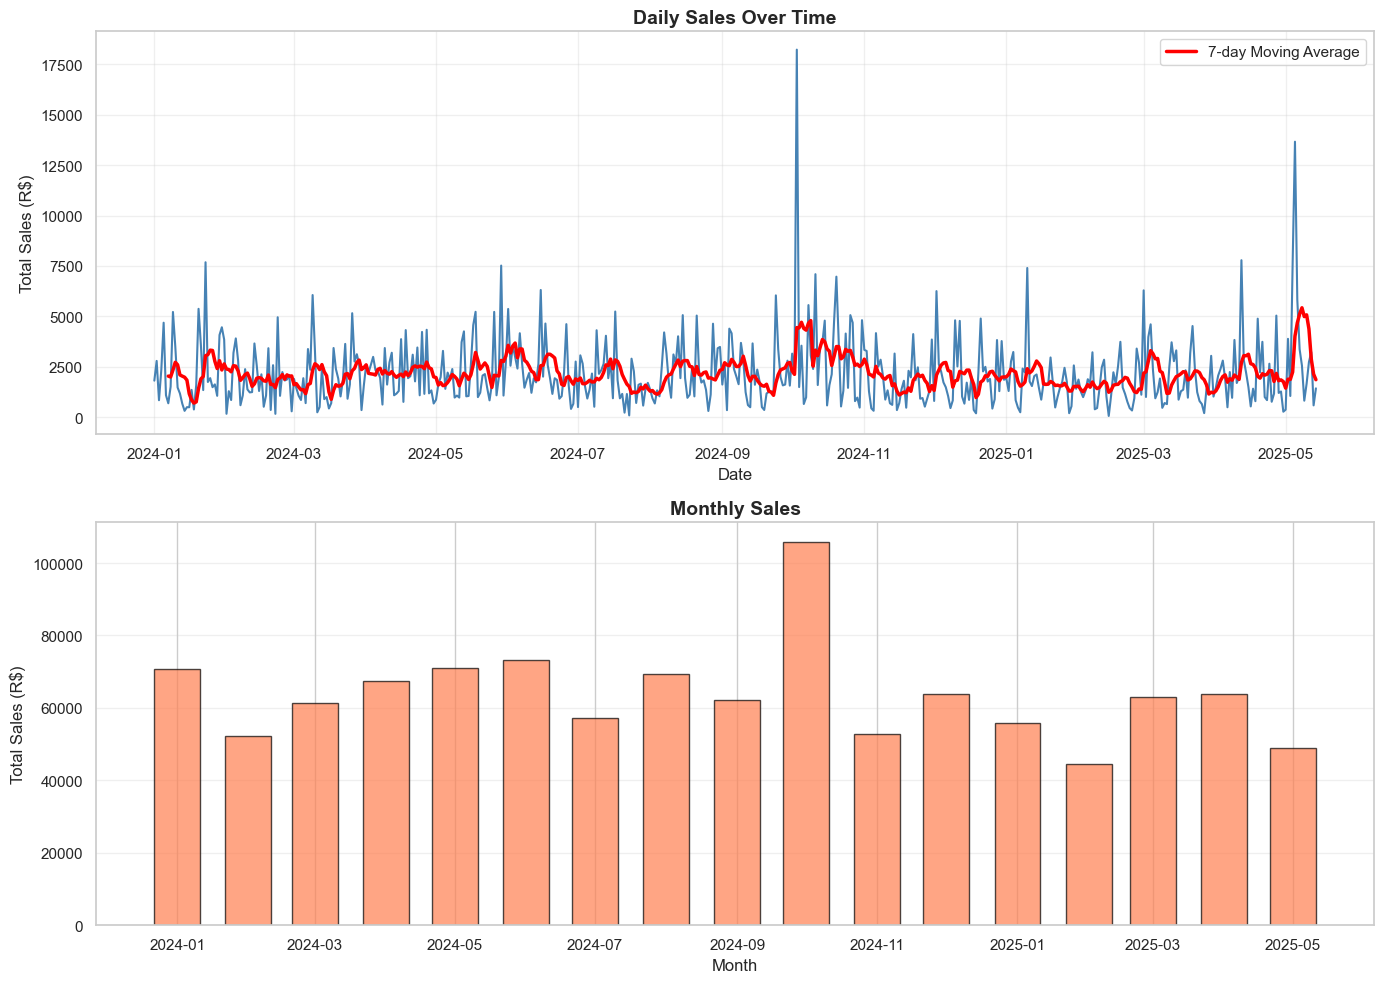

✓ Line charts are standard for time series
✓ Add moving averages to show trends
✓ Consider aggregating to appropriate time periods


In [26]:
# Daily sales over time
daily_sales = df_sales.groupby('Date')['Sales'].sum()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Line plot
axes[0].plot(daily_sales.index, daily_sales.values, linewidth=1.5, color='steelblue')
axes[0].set_title('Daily Sales Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Sales (R$)')
axes[0].grid(True, alpha=0.3)

# Add 7-day rolling average
rolling_avg = daily_sales.rolling(window=7).mean()
axes[0].plot(rolling_avg.index, rolling_avg.values, linewidth=2.5, 
             color='red', label='7-day Moving Average')
axes[0].legend()

# Monthly aggregation
monthly_sales = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

axes[1].bar(monthly_sales.index, monthly_sales.values, width=20, 
            color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('Monthly Sales', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Sales (R$)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Line charts are standard for time series")
print("✓ Add moving averages to show trends")
print("✓ Consider aggregating to appropriate time periods")

## 5. Proportions - Pie Charts vs Alternatives

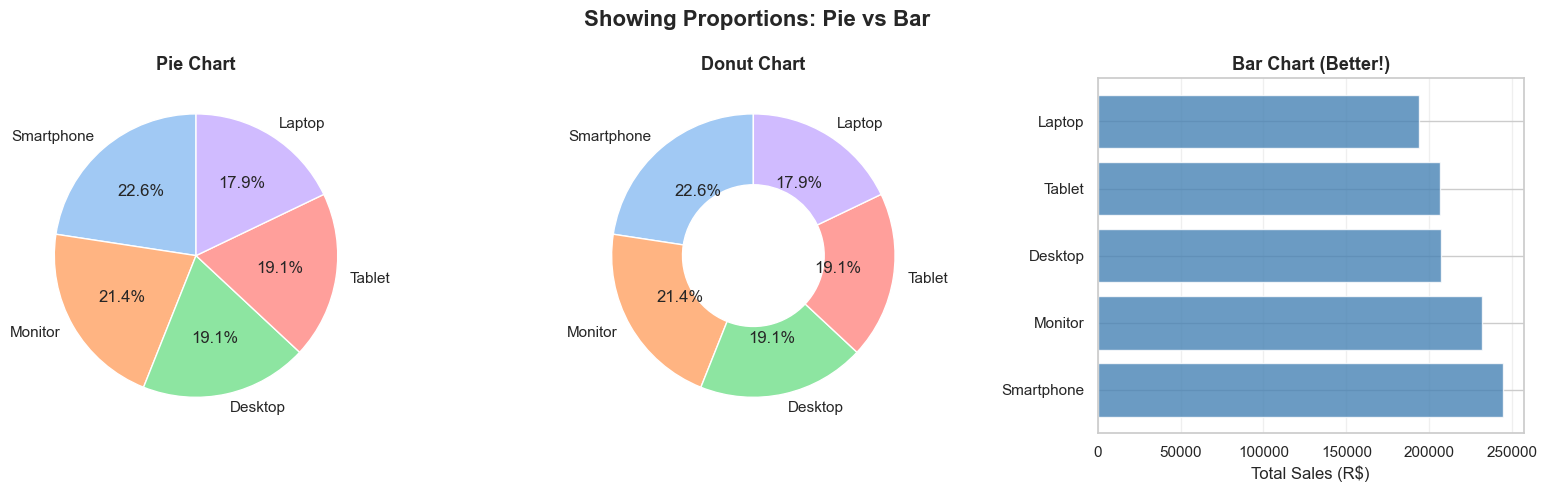


⚠️  Pie Chart Guidelines:
✗ Avoid when: > 5-7 categories, similar-sized slices, need precise comparison
✓ OK when: 2-3 categories, showing parts of whole, one slice clearly dominant
✓ Bar charts are usually better for comparison!


In [27]:
# Product sales proportions
product_sales = df_sales.groupby('Product')['Sales'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Pie chart
axes[0].pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Pie Chart', fontsize=13, fontweight='bold')

# Donut chart (pie with hole)
axes[1].pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'),
            wedgeprops=dict(width=0.5))
axes[1].set_title('Donut Chart', fontsize=13, fontweight='bold')

# Bar chart (better alternative!)
axes[2].barh(product_sales.index, product_sales.values, color='steelblue', alpha=0.8)
axes[2].set_title('Bar Chart (Better!)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Total Sales (R$)')
axes[2].grid(axis='x', alpha=0.3)

plt.suptitle('Showing Proportions: Pie vs Bar', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n⚠️  Pie Chart Guidelines:")
print("✗ Avoid when: > 5-7 categories, similar-sized slices, need precise comparison")
print("✓ OK when: 2-3 categories, showing parts of whole, one slice clearly dominant")
print("✓ Bar charts are usually better for comparison!")

---
# Part 4: Seaborn for Statistical Visualization

Seaborn provides high-level functions for statistical plots

## Distribution Plots with Seaborn

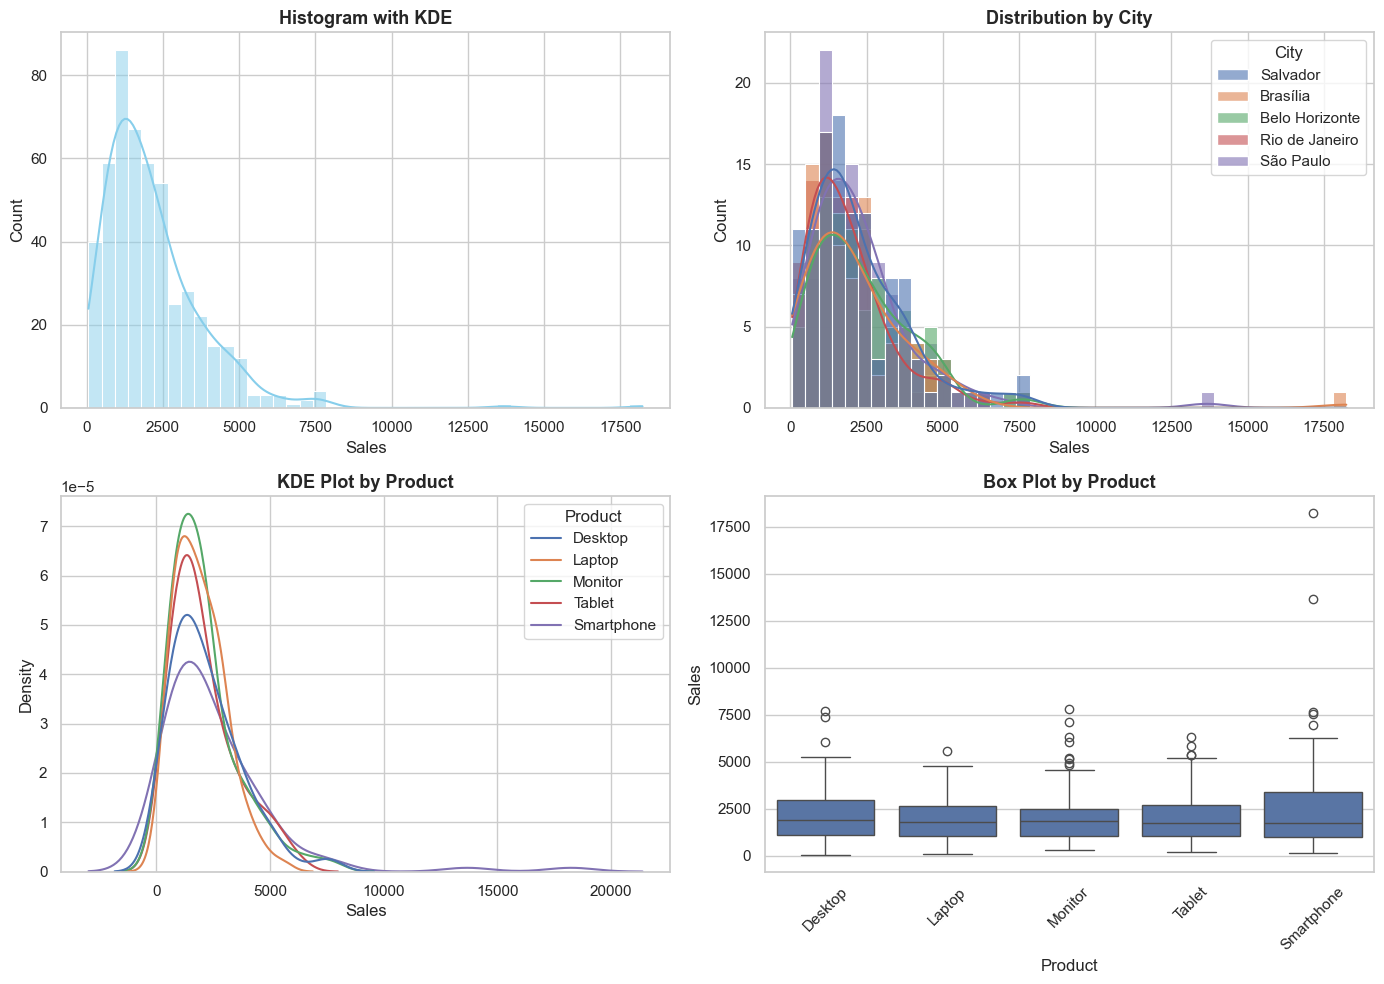

✓ Seaborn makes statistical plots much easier!
✓ Works directly with Pandas DataFrames
✓ Beautiful defaults and automatic legends


In [28]:
# Seaborn distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram with KDE
sns.histplot(data=df_sales, x='Sales', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histogram with KDE', fontsize=13, fontweight='bold')

# Distribution by category
sns.histplot(data=df_sales, x='Sales', hue='City', kde=True, ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Distribution by City', fontsize=13, fontweight='bold')

# KDE plot
sns.kdeplot(data=df_sales, x='Sales', hue='Product', ax=axes[1, 0])
axes[1, 0].set_title('KDE Plot by Product', fontsize=13, fontweight='bold')

# Box plot
sns.boxplot(data=df_sales, x='Product', y='Sales', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot by Product', fontsize=13, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✓ Seaborn makes statistical plots much easier!")
print("✓ Works directly with Pandas DataFrames")
print("✓ Beautiful defaults and automatic legends")

## Categorical Plots

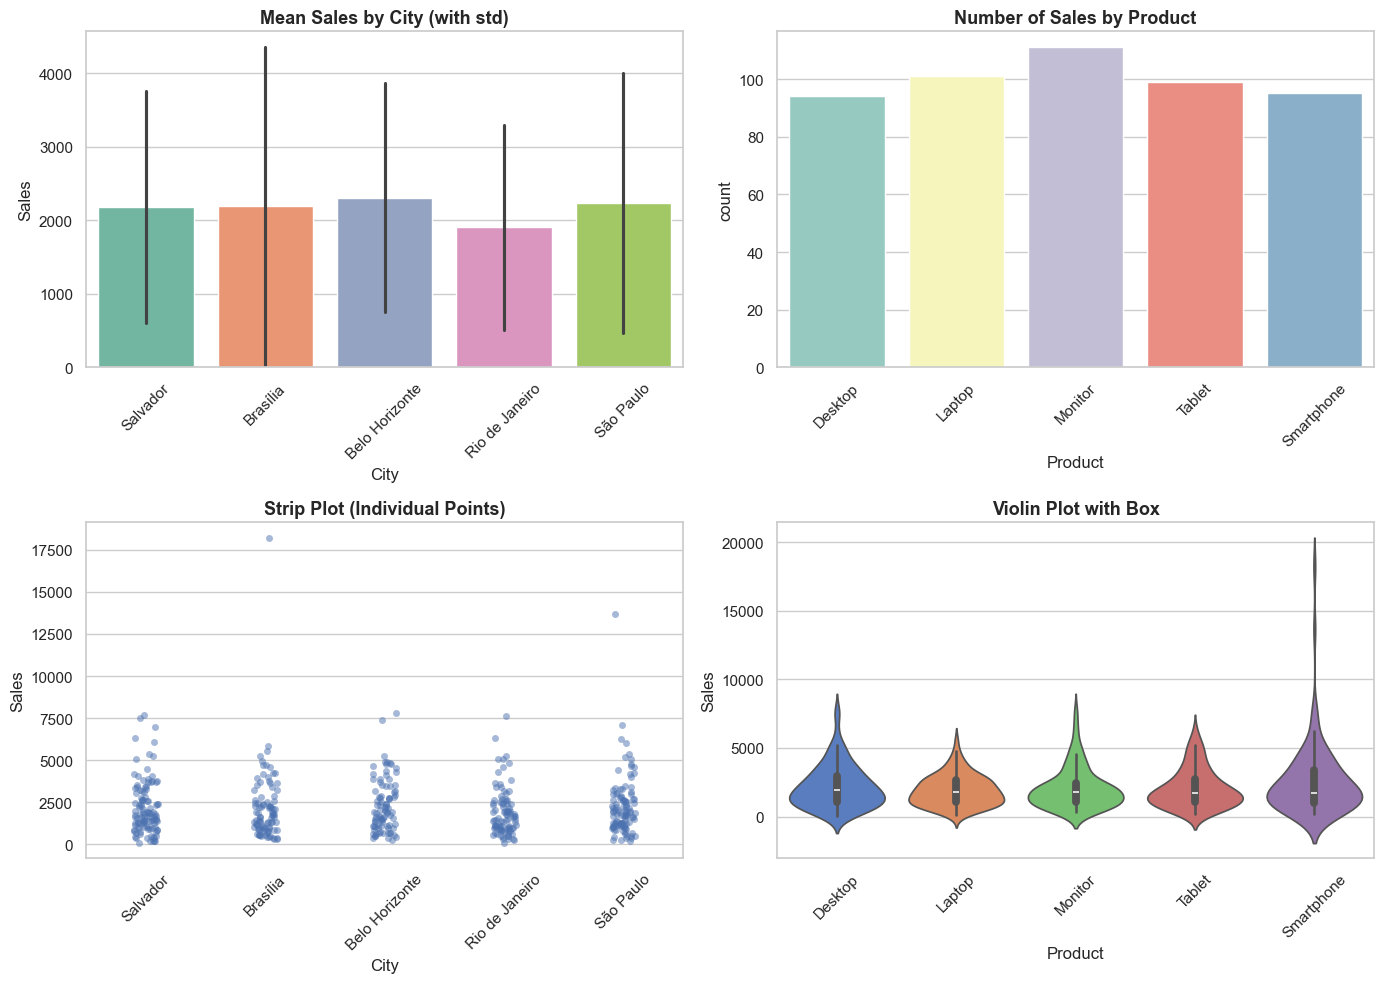

In [29]:
# Seaborn categorical plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar plot (shows mean with confidence interval)
sns.barplot(data=df_sales, x='City', y='Sales', ax=axes[0, 0], 
            errorbar='sd', palette='Set2')
axes[0, 0].set_title('Mean Sales by City (with std)', fontsize=13, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

# Count plot
sns.countplot(data=df_sales, x='Product', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('Number of Sales by Product', fontsize=13, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# Strip plot (shows individual points)
sns.stripplot(data=df_sales, x='City', y='Sales', ax=axes[1, 0], 
              alpha=0.5, jitter=True)
axes[1, 0].set_title('Strip Plot (Individual Points)', fontsize=13, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# Violin plot with inner box
sns.violinplot(data=df_sales, x='Product', y='Sales', ax=axes[1, 1], 
               inner='box', palette='muted')
axes[1, 1].set_title('Violin Plot with Box', fontsize=13, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Regression Plots

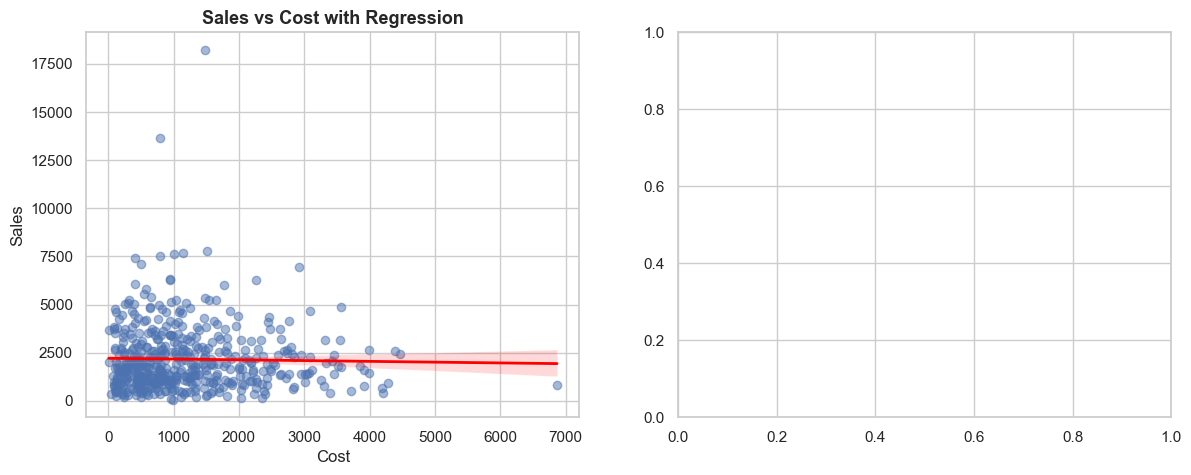

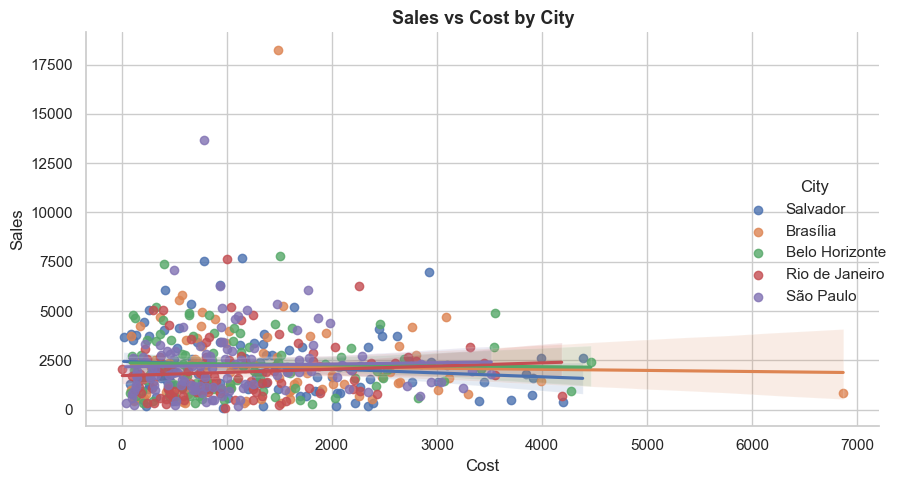

✓ regplot() adds regression line to scatter plot
✓ lmplot() creates separate plots by category


In [30]:
# Regression plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Simple regression plot
sns.regplot(data=df_sales, x='Cost', y='Sales', ax=axes[0], 
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'linewidth': 2})
axes[0].set_title('Sales vs Cost with Regression', fontsize=13, fontweight='bold')

# Regression by category
sns.lmplot(data=df_sales, x='Cost', y='Sales', hue='City', height=5, aspect=1.5)
plt.title('Sales vs Cost by City', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ regplot() adds regression line to scatter plot")
print("✓ lmplot() creates separate plots by category")

## Correlation Heatmap

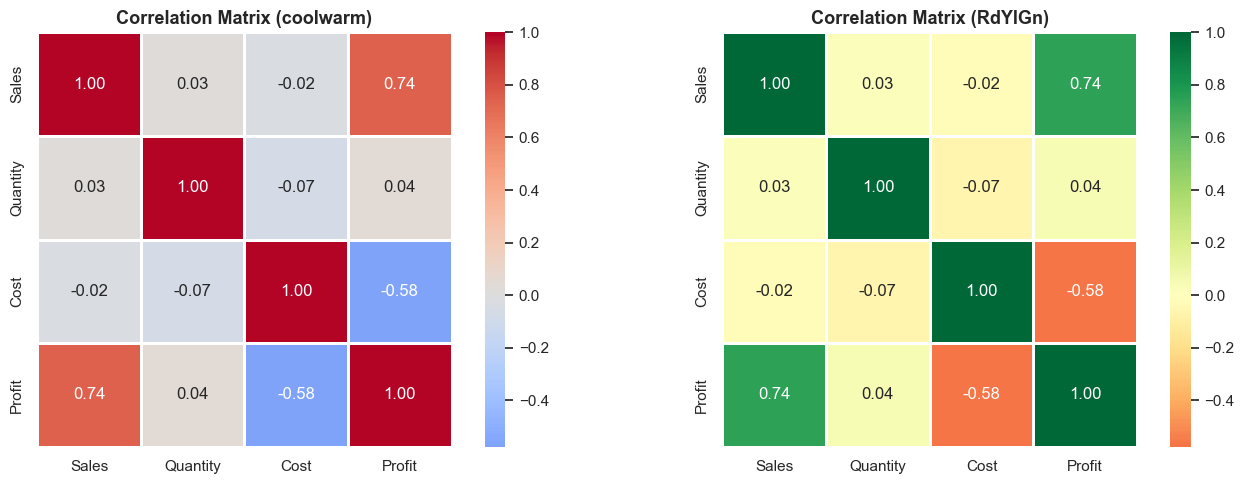

✓ Heatmaps show many pairwise relationships at once
✓ Use diverging colormap for correlation (centered at 0)
✓ annotate values for precise reading


In [31]:
# Correlation matrix
numeric_cols = ['Sales', 'Quantity', 'Cost', 'Profit']
corr_matrix = df_sales[numeric_cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap with default colors
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[0], square=True, linewidths=1)
axes[0].set_title('Correlation Matrix (coolwarm)', fontsize=13, fontweight='bold')

# Heatmap with different colormap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, ax=axes[1], square=True, linewidths=1)
axes[1].set_title('Correlation Matrix (RdYlGn)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Heatmaps show many pairwise relationships at once")
print("✓ Use diverging colormap for correlation (centered at 0)")
print("✓ annotate values for precise reading")

## Pair Plot - Explore All Relationships

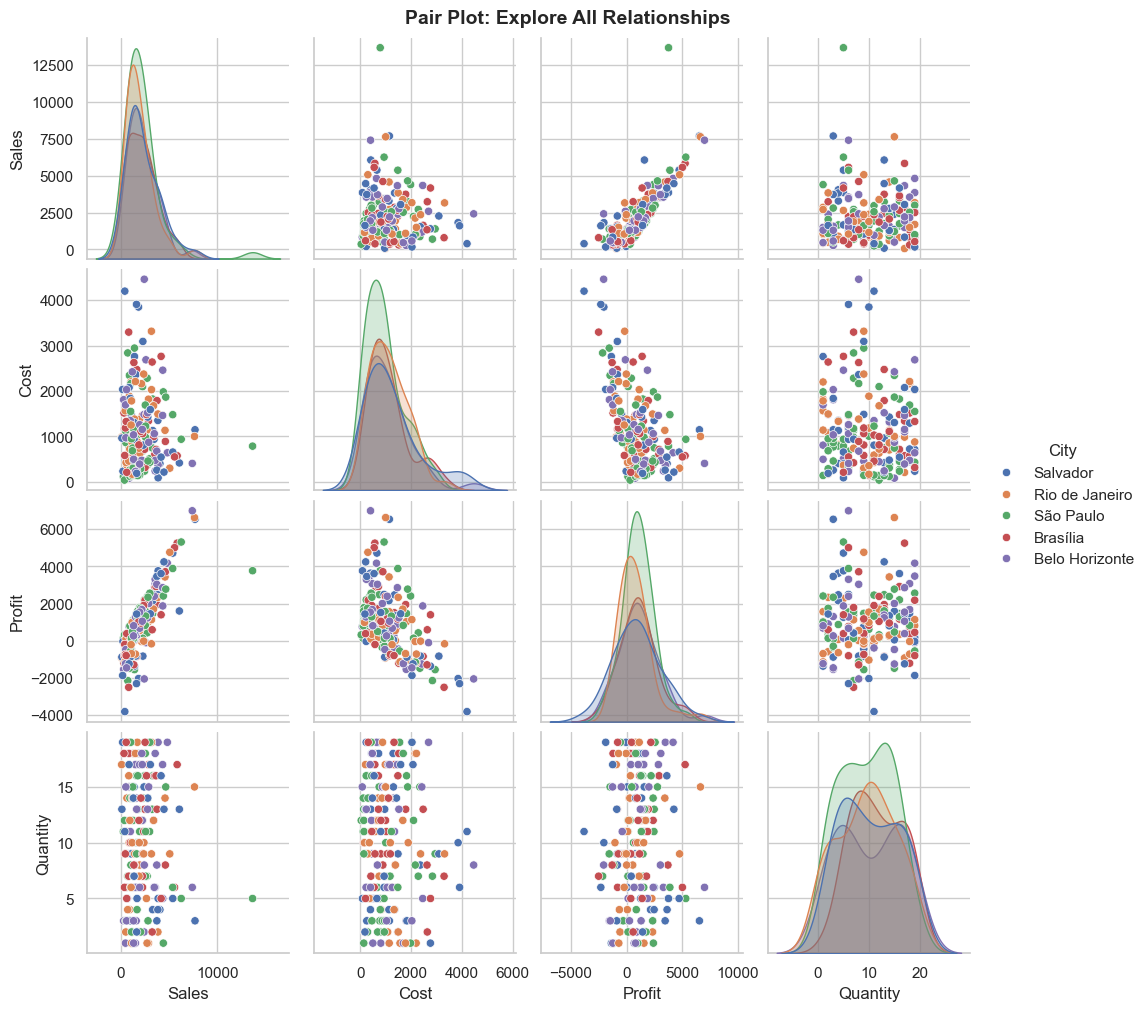

✓ Pair plot shows all pairwise relationships in one view
✓ Diagonal shows distributions
✓ Off-diagonal shows scatter plots
✓ Great for initial exploration!


In [32]:
# Pair plot - matrix of scatter plots
# Sample data for faster plotting
df_sample = df_sales.sample(n=200, random_state=42)

sns.pairplot(df_sample[['Sales', 'Cost', 'Profit', 'Quantity', 'City']], 
             hue='City', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot: Explore All Relationships', y=1.01, fontsize=14, fontweight='bold')
plt.show()

print("✓ Pair plot shows all pairwise relationships in one view")
print("✓ Diagonal shows distributions")
print("✓ Off-diagonal shows scatter plots")
print("✓ Great for initial exploration!")

## Small Multiples (Faceting)

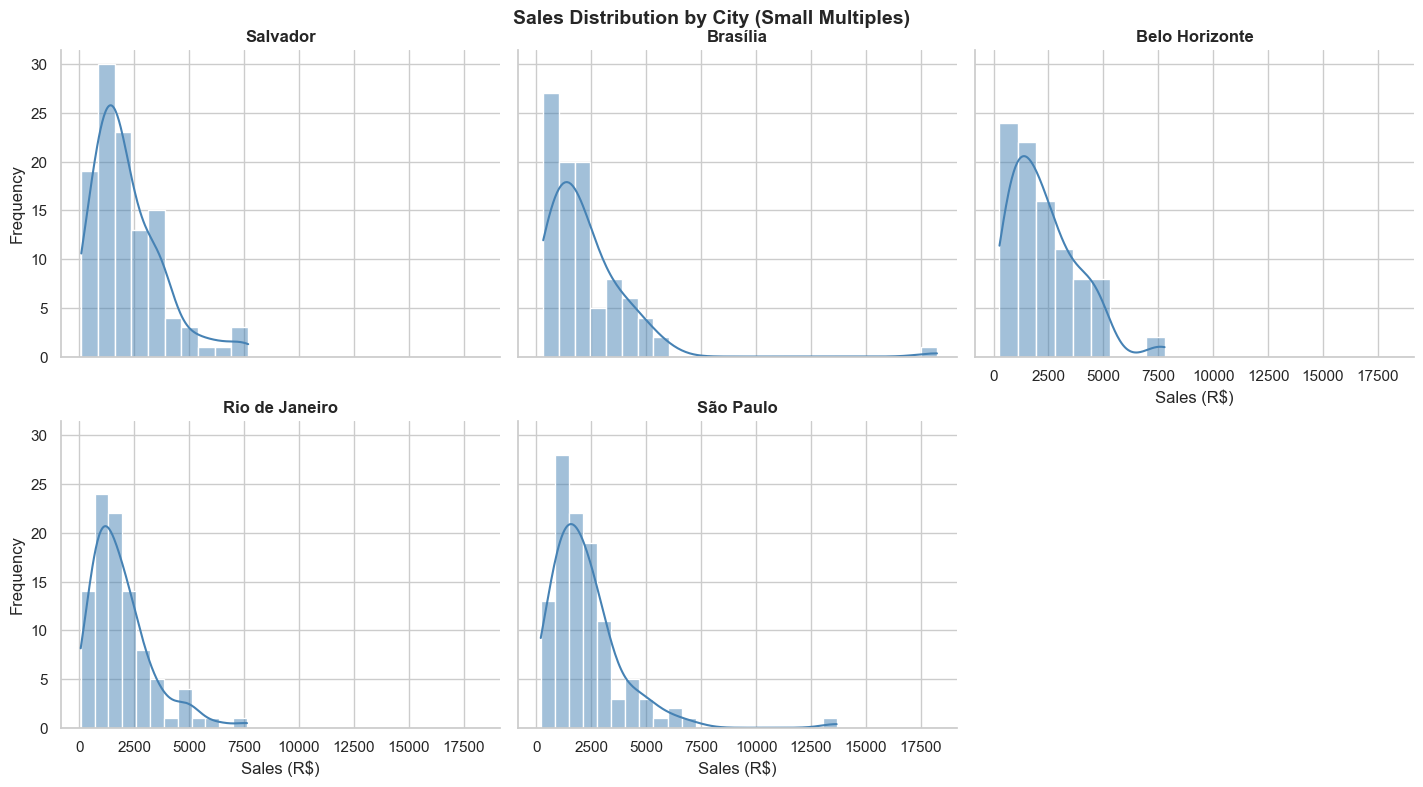

✓ Small multiples: same chart structure, different subsets
✓ Easier to compare than overlapping plots
✓ Keep scales consistent for fair comparison


In [33]:
# FacetGrid - small multiples
g = sns.FacetGrid(df_sales, col='City', col_wrap=3, height=4, aspect=1.2)
g.map(sns.histplot, 'Sales', kde=True, color='steelblue')
g.set_titles('{col_name}', fontsize=13, fontweight='bold')
g.set_axis_labels('Sales (R$)', 'Frequency')
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Sales Distribution by City (Small Multiples)', fontsize=14, fontweight='bold')
plt.show()

print("✓ Small multiples: same chart structure, different subsets")
print("✓ Easier to compare than overlapping plots")
print("✓ Keep scales consistent for fair comparison")

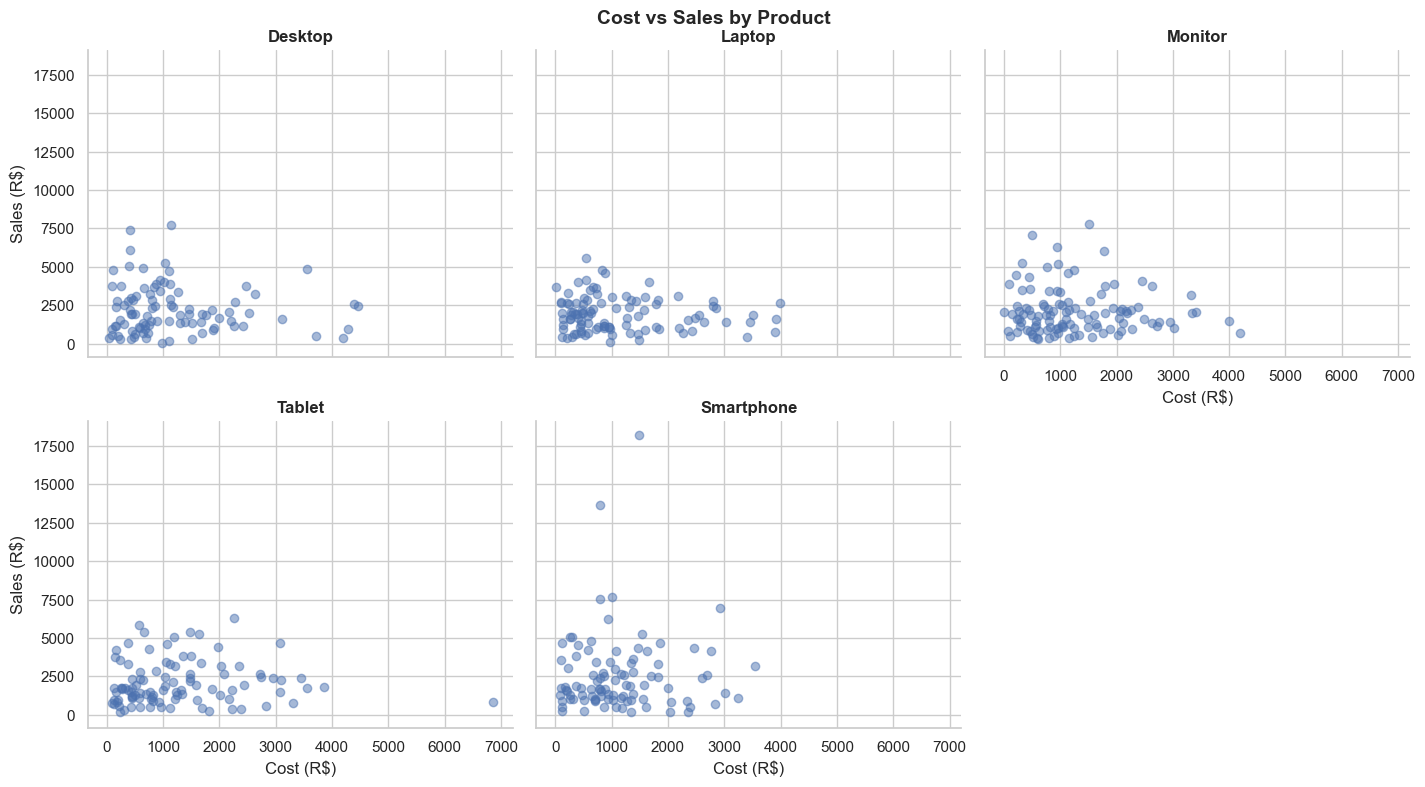

In [34]:
# Faceted scatter plot
g = sns.FacetGrid(df_sales, col='Product', col_wrap=3, height=4, aspect=1.2)
g.map(plt.scatter, 'Cost', 'Sales', alpha=0.5)
g.set_titles('{col_name}', fontsize=13, fontweight='bold')
g.set_axis_labels('Cost (R$)', 'Sales (R$)')
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Cost vs Sales by Product', fontsize=14, fontweight='bold')
plt.show()

---
# Part 5: Bad Practices - What NOT to Do

## Example 1: Truncated Y-Axis on Bar Charts

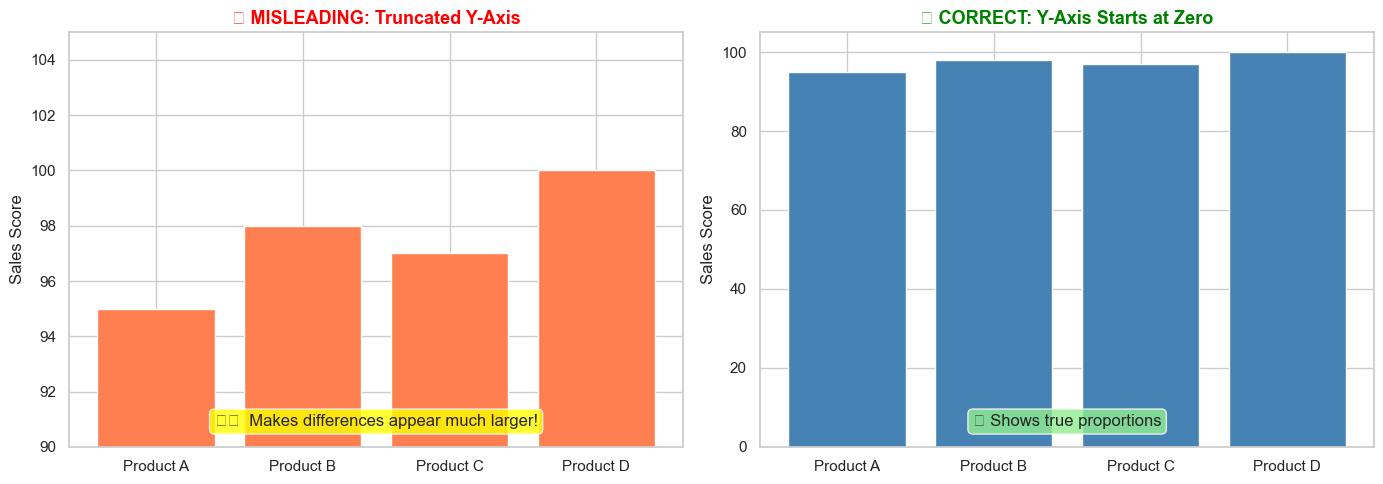


   RULE: Bar charts must start at zero!
   Bar length should be proportional to the value
   Truncating exaggerates small differences


In [53]:
# Create data with small differences
categories = ['Product A', 'Product B', 'Product C', 'Product D']
values = [95, 98, 97, 100]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# WRONG: Y-axis doesn't start at zero
axes[0].bar(categories, values, color='coral')
axes[0].set_ylim(90, 105)
axes[0].set_title('❌ MISLEADING: Truncated Y-Axis', fontsize=13, fontweight='bold', color='red')
axes[0].set_ylabel('Sales Score')
axes[0].text(0.5, 0.05, '⚠️  Makes differences appear much larger!', 
             transform=axes[0].transAxes, ha='center',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# CORRECT: Y-axis starts at zero
axes[1].bar(categories, values, color='steelblue')
axes[1].set_ylim(0, 105)
axes[1].set_title('✓ CORRECT: Y-Axis Starts at Zero', fontsize=13, fontweight='bold', color='green')
axes[1].set_ylabel('Sales Score')
axes[1].text(0.5, 0.05, '✓ Shows true proportions', 
             transform=axes[1].transAxes, ha='center',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n   RULE: Bar charts must start at zero!")
print("   Bar length should be proportional to the value")
print("   Truncating exaggerates small differences")

## Example 2: Too Many Categories in Pie Chart

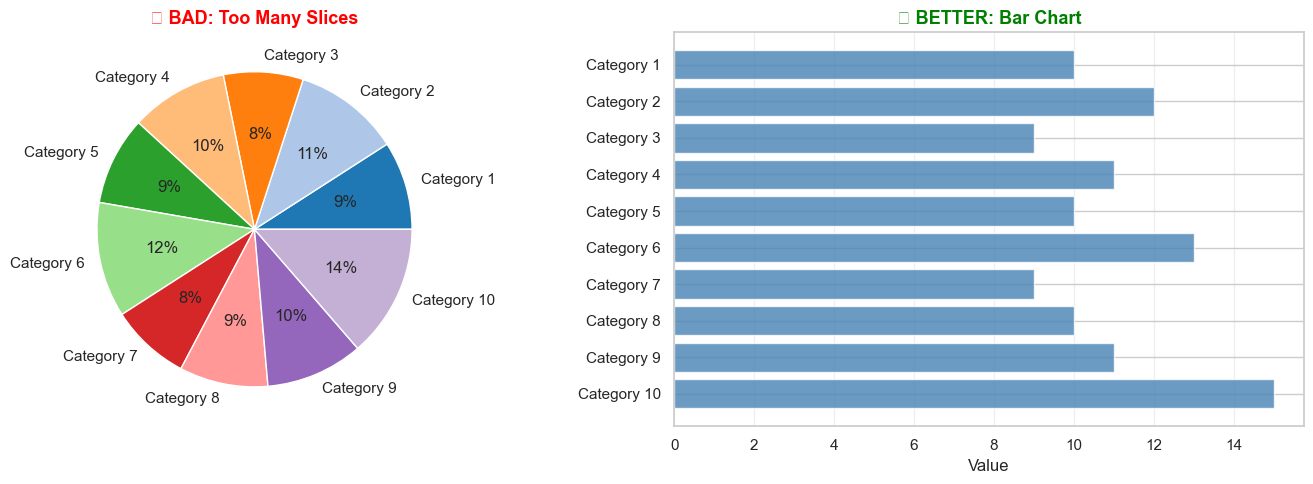


⚠️  Pie Chart Problems:
   ✗ Too many slices (> 5-7) makes comparison difficult
   ✗ Humans are poor at judging angles
   ✓ Use bar charts for better comparison


In [36]:
# Create data with many similar values
many_categories = [f'Category {i}' for i in range(1, 11)]
many_values = [10, 12, 9, 11, 10, 13, 9, 10, 11, 15]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# WRONG: Too many slices
axes[0].pie(many_values, labels=many_categories, autopct='%1.0f%%',
            colors=sns.color_palette('tab20', 10))
axes[0].set_title('❌ BAD: Too Many Slices', fontsize=13, fontweight='bold', color='red')

# BETTER: Bar chart
axes[1].barh(many_categories, many_values, color='steelblue', alpha=0.8)
axes[1].set_title('✓ BETTER: Bar Chart', fontsize=13, fontweight='bold', color='green')
axes[1].set_xlabel('Value')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️  Pie Chart Problems:")
print("   ✗ Too many slices (> 5-7) makes comparison difficult")
print("   ✗ Humans are poor at judging angles")
print("   ✓ Use bar charts for better comparison")

## Example 3: 3D Charts (Usually Bad)

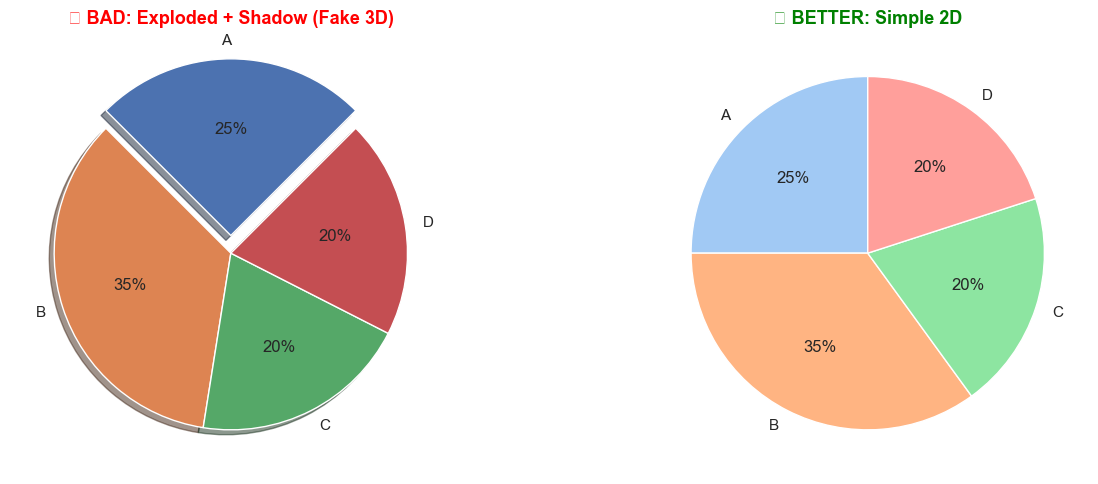


⚠️  3D Effects Problems:
   ✗ Distort perception (farther slices look smaller)
   ✗ Add no information, just decoration
   ✗ Harder to read accurate values
   ✓ Stick to 2D for clarity


In [37]:
# Create simple data
categories = ['A', 'B', 'C', 'D']
values = [25, 35, 20, 20]

fig = plt.figure(figsize=(14, 5))

# WRONG: 3D pie chart (matplotlib doesn't do 3D pie, but we can show the concept)
ax1 = fig.add_subplot(121)
explode = (0.1, 0, 0, 0)  # "explode" first slice
ax1.pie(values, labels=categories, autopct='%1.0f%%', startangle=45,
        explode=explode, shadow=True)
ax1.set_title('❌ BAD: Exploded + Shadow (Fake 3D)', fontsize=13, fontweight='bold', color='red')

# CORRECT: Simple 2D
ax2 = fig.add_subplot(122)
ax2.pie(values, labels=categories, autopct='%1.0f%%', startangle=90,
        colors=sns.color_palette('pastel'))
ax2.set_title('✓ BETTER: Simple 2D', fontsize=13, fontweight='bold', color='green')

plt.tight_layout()
plt.show()

print("\n⚠️  3D Effects Problems:")
print("   ✗ Distort perception (farther slices look smaller)")
print("   ✗ Add no information, just decoration")
print("   ✗ Harder to read accurate values")
print("   ✓ Stick to 2D for clarity")

## Example 4: Bad Color Choices

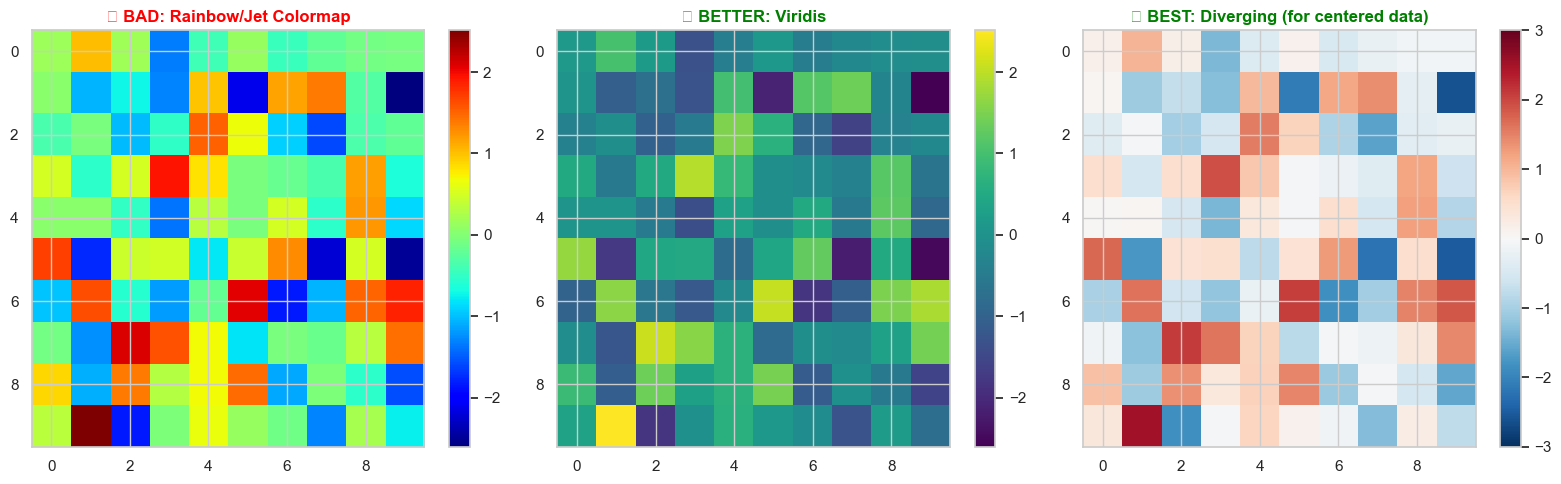


⚠️  Rainbow Colormap Problems:
   ✗ Not perceptually uniform (yellow appears brighter)
   ✗ Creates artificial boundaries
   ✗ Bad for colorblind viewers
   ✗ Doesn't print well in grayscale

✓ Better alternatives:
   Sequential: viridis, plasma, cividis
   Diverging: RdBu, coolwarm (for data with center point)


In [38]:
# Create heatmap data
data = np.random.randn(10, 10)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# WRONG: Rainbow (jet) colormap
im1 = axes[0].imshow(data, cmap='jet', aspect='auto')
axes[0].set_title('❌ BAD: Rainbow/Jet Colormap', fontsize=12, fontweight='bold', color='red')
plt.colorbar(im1, ax=axes[0])

# BETTER: Perceptually uniform
im2 = axes[1].imshow(data, cmap='viridis', aspect='auto')
axes[1].set_title('✓ BETTER: Viridis', fontsize=12, fontweight='bold', color='green')
plt.colorbar(im2, ax=axes[1])

# BEST: Diverging for data with meaningful center
im3 = axes[2].imshow(data, cmap='RdBu_r', aspect='auto', vmin=-3, vmax=3)
axes[2].set_title('✓ BEST: Diverging (for centered data)', fontsize=12, fontweight='bold', color='green')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

print("\n⚠️  Rainbow Colormap Problems:")
print("   ✗ Not perceptually uniform (yellow appears brighter)")
print("   ✗ Creates artificial boundaries")
print("   ✗ Bad for colorblind viewers")
print("   ✗ Doesn't print well in grayscale")
print("\n✓ Better alternatives:")
print("   Sequential: viridis, plasma, cividis")
print("   Diverging: RdBu, coolwarm (for data with center point)")

## Example 5: Overplotting

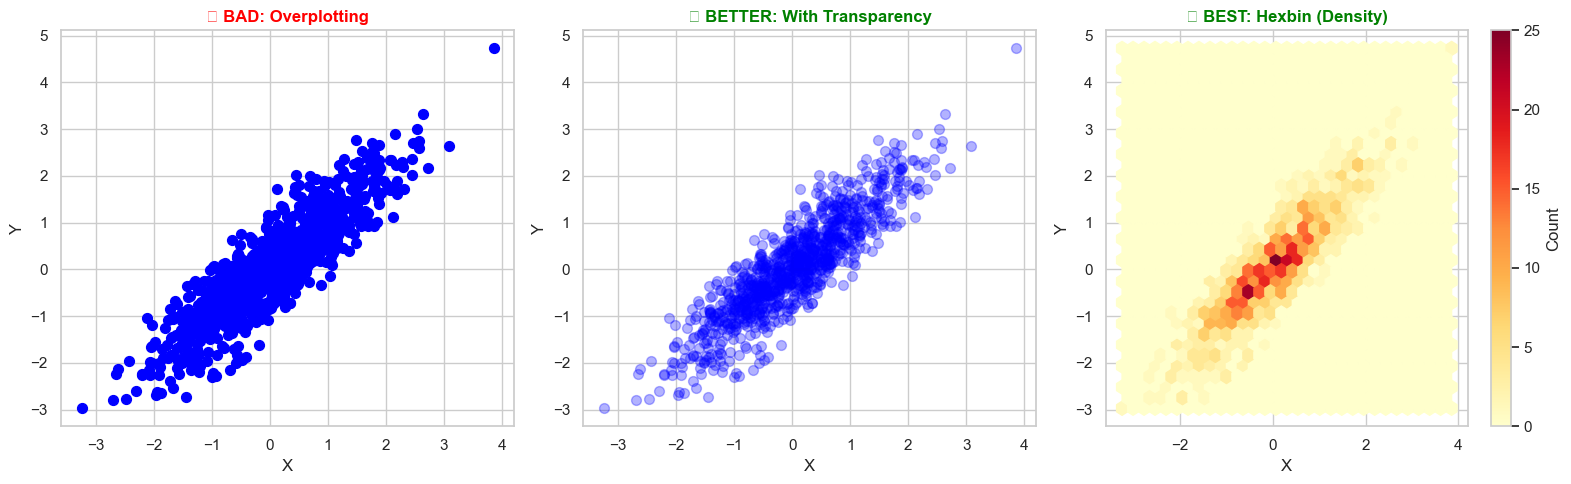


⚠️  Solutions for Overplotting:
   ✓ Add transparency (alpha < 1)
   ✓ Use smaller point size
   ✓ Use 2D histogram/hexbin for density
   ✓ Sample the data if too many points


In [ ]:
# Create overlapping data
np.random.seed(42)
x = np.random.randn(1000)
y = x + np.random.randn(1000) * 0.5

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# WRONG: Solid points, no transparency
axes[0].scatter(x, y, s=50, c='blue')
axes[0].set_title('BAD: Overplotting', fontsize=12, fontweight='bold', color='red')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# BETTER: Add transparency
axes[1].scatter(x, y, s=50, c='blue', alpha=0.3)
axes[1].set_title('BETTER: With Transparency', fontsize=12, fontweight='bold', color='green')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# BEST: 2D histogram (hexbin)
axes[2].hexbin(x, y, gridsize=30, cmap='YlOrRd')
axes[2].set_title('BEST: Hexbin (Density)', fontsize=12, fontweight='bold', color='green')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
plt.colorbar(axes[2].collections[0], ax=axes[2], label='Count')

plt.tight_layout()
plt.show()

print("\n  Solutions for Overplotting:")
print("    Add transparency (alpha < 1)")
print("    Use smaller point size")
print("    Use 2D histogram/hexbin for density")
print("    Sample the data if too many points")

## Example 6: Missing Labels and Context

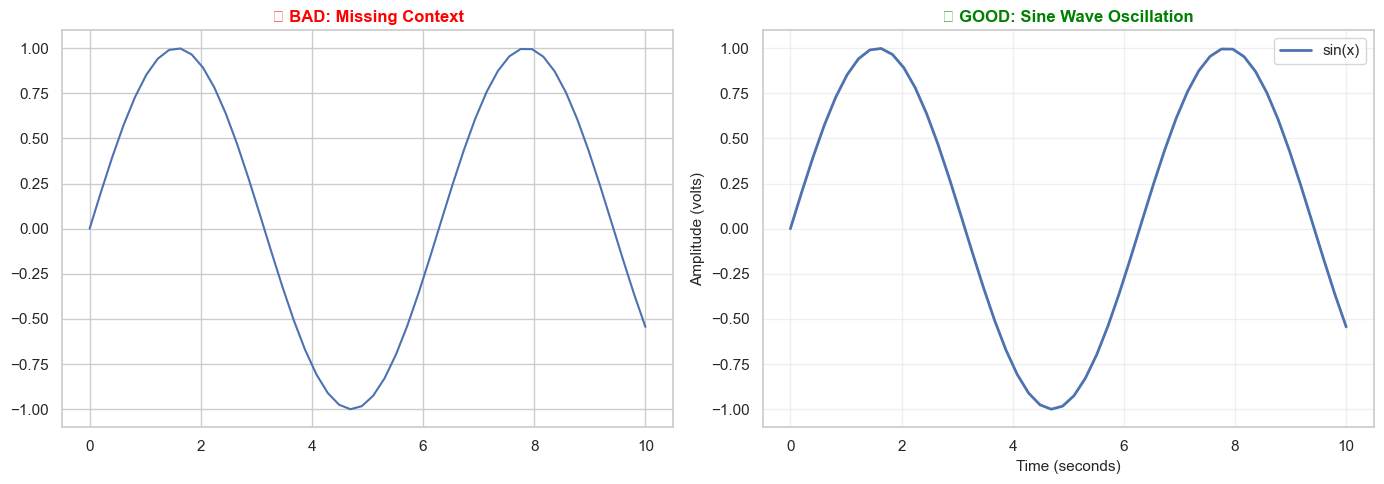


⚠️  Required Elements for Any Plot:
   ✓ Descriptive axis labels WITH UNITS
   ✓ Clear title or caption
   ✓ Legend when using multiple series
   ✓ Data source (when applicable)

   A plot should be self-explanatory!


In [ ]:
# Sample data
x = np.linspace(0, 10, 50)
y = np.sin(x)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# WRONG: No labels or context
axes[0].plot(x, y)
axes[0].set_title('BAD: Missing Context', fontsize=12, fontweight='bold', color='red')
# No axis labels, no units, no legend

# CORRECT: Complete labels
axes[1].plot(x, y, linewidth=2, label='sin(x)')
axes[1].set_xlabel('Time (seconds)', fontsize=11)
axes[1].set_ylabel('Amplitude (volts)', fontsize=11)
axes[1].set_title('GOOD: Sine Wave Oscillation', fontsize=12, fontweight='bold', color='green')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n   Required Elements for Any Plot:")
print("     Descriptive axis labels WITH UNITS")
print("     Clear title or caption")
print("     Legend when using multiple series")
print("     Data source (when applicable)")
print("\n   A plot should be self-explanatory!")

---
# Part 6: Exploratory Data Analysis Workflow (Advanced)

## Complete EDA Example

In [41]:
print("=== EXPLORATORY DATA ANALYSIS WORKFLOW ===")
print("\nStep 1: Load and inspect data")
print(f"Dataset shape: {df_sales.shape}")
print(f"Columns: {df_sales.columns.tolist()}")
print("\nFirst few rows:")
display(df_sales.head())

=== EXPLORATORY DATA ANALYSIS WORKFLOW ===

Step 1: Load and inspect data
Dataset shape: (500, 10)
Columns: ['Date', 'City', 'Product', 'Sales', 'Quantity', 'Cost', 'Profit', 'Month', 'Quarter', 'DayOfWeek']

First few rows:


,Date,City,Product,Sales,Quantity,Cost,Profit,Month,Quarter,DayOfWeek
0,2024-01-01,Salvador,Desktop,1811.921371,18,722.002802,1089.918569,January,1,Monday
1,2024-01-02,Brasília,Laptop,2790.173792,17,2800.665135,-10.491343,January,1,Tuesday
2,2024-01-03,Belo Horizonte,Monitor,840.281641,15,78.721306,761.560334,January,1,Wednesday
3,2024-01-04,Brasília,Tablet,2352.430393,11,453.349914,1899.080479,January,1,Thursday
4,2024-01-05,Brasília,Tablet,4685.557345,13,3083.325166,1602.232179,January,1,Friday



Step 2: Understand individual variables (distributions)


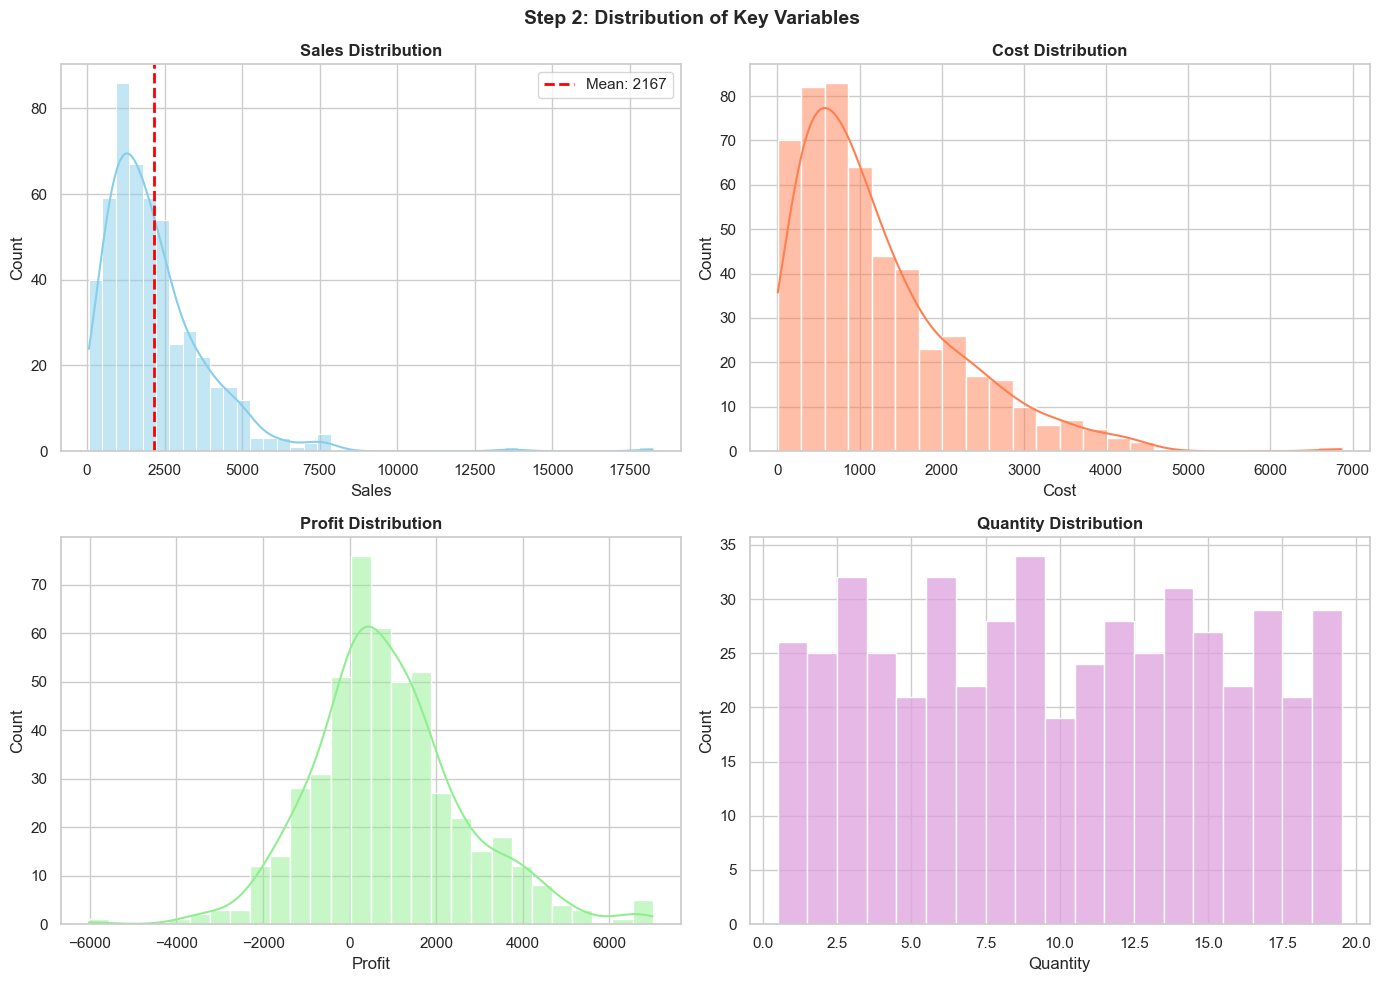


📊 Observations:
   - Sales are right-skewed (mean > median)
   - Some outliers present in sales data
   - Profit distribution follows sales pattern


In [42]:
print("\nStep 2: Understand individual variables (distributions)")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sales distribution
sns.histplot(df_sales['Sales'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Sales Distribution', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df_sales['Sales'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f"Mean: {df_sales['Sales'].mean():.0f}")
axes[0, 0].legend()

# Cost distribution
sns.histplot(df_sales['Cost'], kde=True, ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Cost Distribution', fontsize=12, fontweight='bold')

# Profit distribution
sns.histplot(df_sales['Profit'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Profit Distribution', fontsize=12, fontweight='bold')

# Quantity distribution
sns.histplot(df_sales['Quantity'], kde=False, ax=axes[1, 1], color='plum', discrete=True)
axes[1, 1].set_title('Quantity Distribution', fontsize=12, fontweight='bold')

plt.suptitle('Step 2: Distribution of Key Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print(f"   - Sales are right-skewed (mean > median)")
print(f"   - Some outliers present in sales data")
print(f"   - Profit distribution follows sales pattern")


Step 3: Examine relationships between variables


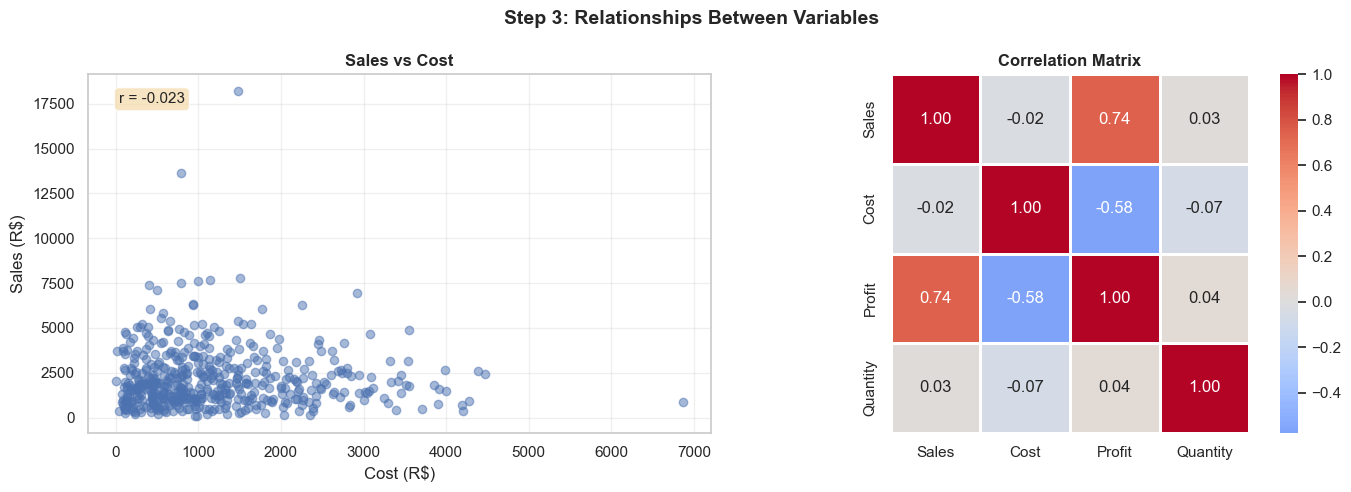


📊 Observations:
   - Positive correlation between Cost and Sales
   - Profit strongly related to Sales (as expected)


In [43]:
print("\nStep 3: Examine relationships between variables")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter: Sales vs Cost
axes[0].scatter(df_sales['Cost'], df_sales['Sales'], alpha=0.5)
axes[0].set_xlabel('Cost (R$)')
axes[0].set_ylabel('Sales (R$)')
axes[0].set_title('Sales vs Cost', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add correlation
corr = df_sales['Cost'].corr(df_sales['Sales'])
axes[0].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[0].transAxes,
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Correlation heatmap
corr_matrix = df_sales[['Sales', 'Cost', 'Profit', 'Quantity']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[1], square=True, linewidths=1)
axes[1].set_title('Correlation Matrix', fontsize=12, fontweight='bold')

plt.suptitle('Step 3: Relationships Between Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print(f"   - Positive correlation between Cost and Sales")
print(f"   - Profit strongly related to Sales (as expected)")


Step 4: Compare groups (categorical analysis)


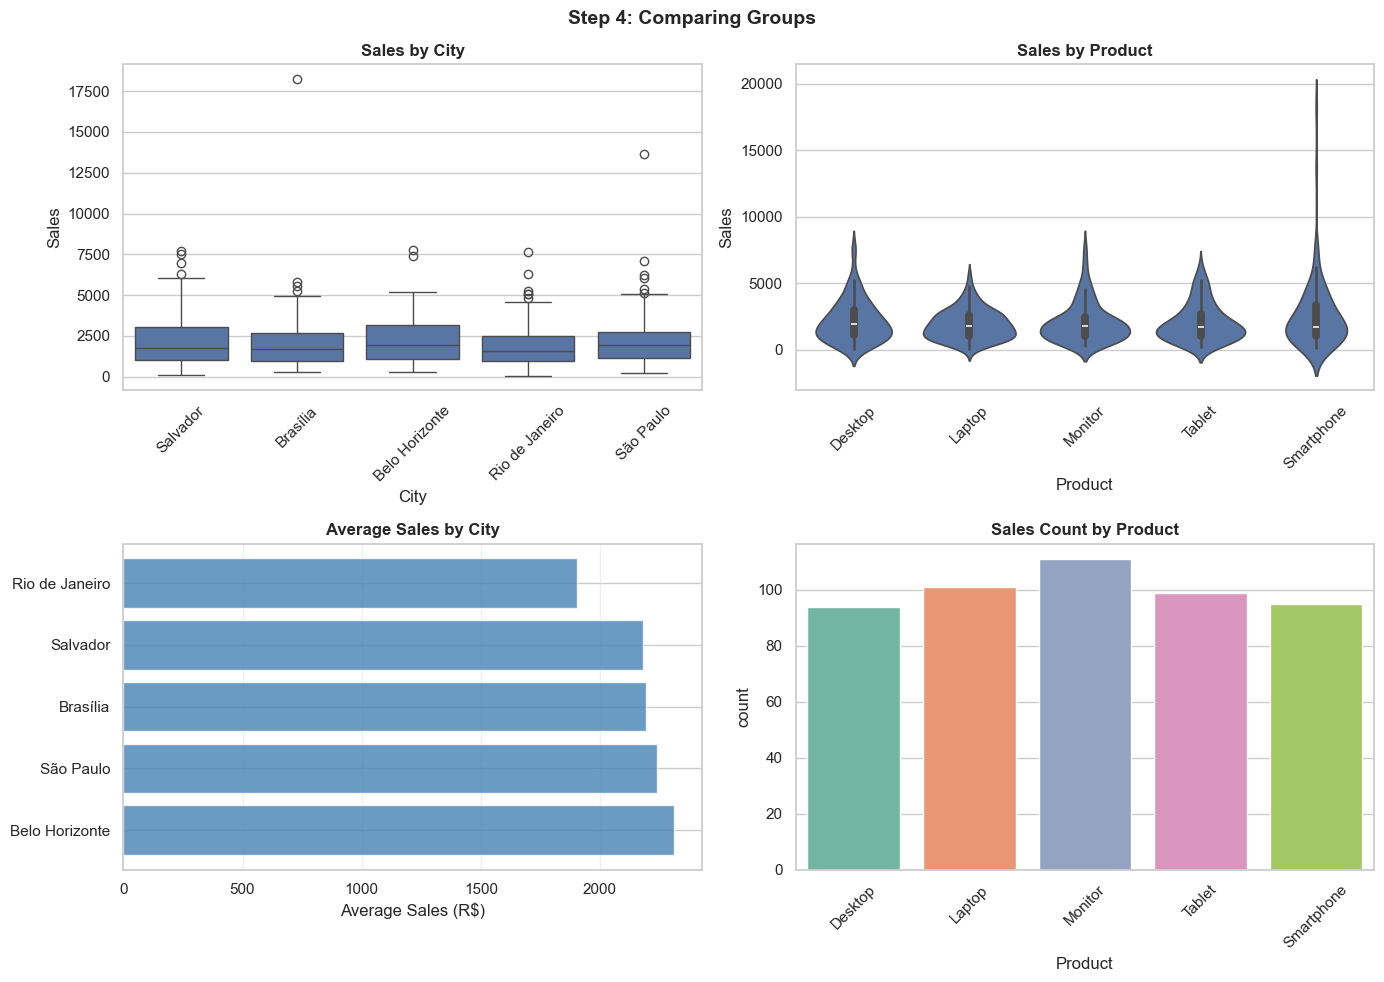


📊 Observations:
   - Sales vary significantly across cities
   - Product distribution is relatively balanced


In [44]:
print("\nStep 4: Compare groups (categorical analysis)")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Box plot by city
sns.boxplot(data=df_sales, x='City', y='Sales', ax=axes[0, 0])
axes[0, 0].set_title('Sales by City', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

# Violin plot by product
sns.violinplot(data=df_sales, x='Product', y='Sales', ax=axes[0, 1])
axes[0, 1].set_title('Sales by Product', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar plot: mean sales by city
city_mean = df_sales.groupby('City')['Sales'].mean().sort_values(ascending=False)
axes[1, 0].barh(city_mean.index, city_mean.values, color='steelblue', alpha=0.8)
axes[1, 0].set_title('Average Sales by City', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Average Sales (R$)')
axes[1, 0].grid(axis='x', alpha=0.3)

# Count by product
sns.countplot(data=df_sales, x='Product', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Sales Count by Product', fontsize=12, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Step 4: Comparing Groups', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print(f"   - Sales vary significantly across cities")
print(f"   - Product distribution is relatively balanced")


Step 5: Identify outliers and anomalies


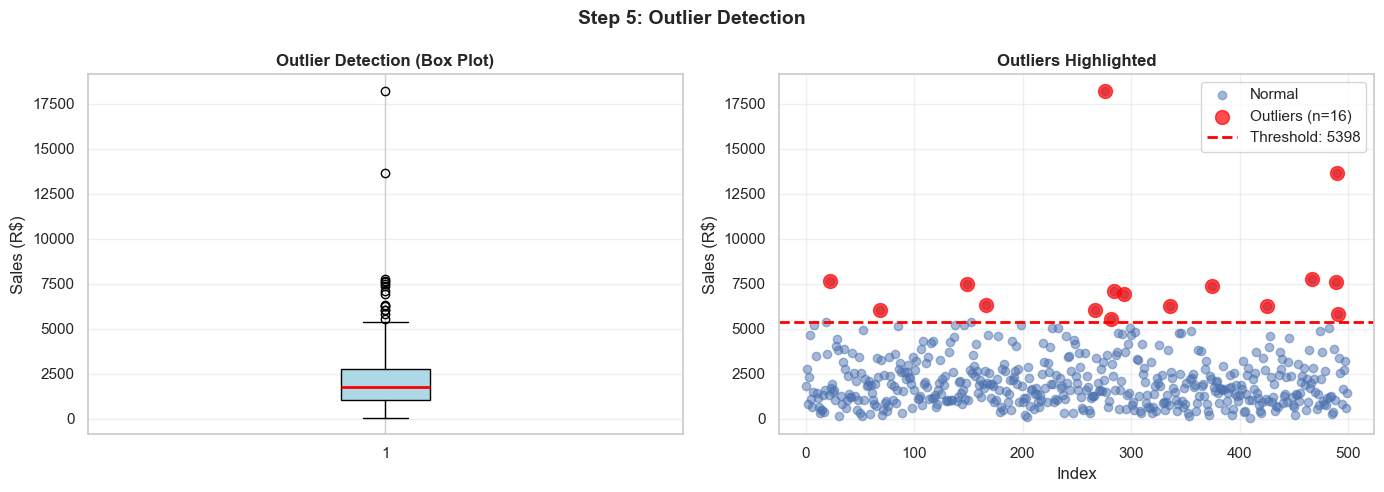


📊 Found 16 outliers
   Threshold: R$ 5398.09

   Next steps: Investigate if these are errors or genuine extreme values


In [45]:
print("\nStep 5: Identify outliers and anomalies")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot to identify outliers
axes[0].boxplot(df_sales['Sales'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue'),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_ylabel('Sales (R$)')
axes[0].set_title('Outlier Detection (Box Plot)', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Identify outliers using IQR method
Q1 = df_sales['Sales'].quantile(0.25)
Q3 = df_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_high = Q3 + 1.5 * IQR
outliers = df_sales[df_sales['Sales'] > outlier_threshold_high]

# Scatter with outliers highlighted
axes[1].scatter(df_sales.index, df_sales['Sales'], alpha=0.5, label='Normal')
axes[1].scatter(outliers.index, outliers['Sales'], color='red', s=100, 
                alpha=0.7, label=f'Outliers (n={len(outliers)})')
axes[1].axhline(outlier_threshold_high, color='red', linestyle='--', 
                linewidth=2, label=f'Threshold: {outlier_threshold_high:.0f}')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Sales (R$)')
axes[1].set_title('Outliers Highlighted', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Step 5: Outlier Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📊 Found {len(outliers)} outliers")
print(f"   Threshold: R$ {outlier_threshold_high:.2f}")
print("\n   Next steps: Investigate if these are errors or genuine extreme values")

---
# Part 7: Customization and Styling

## Making Plots Publication-Ready

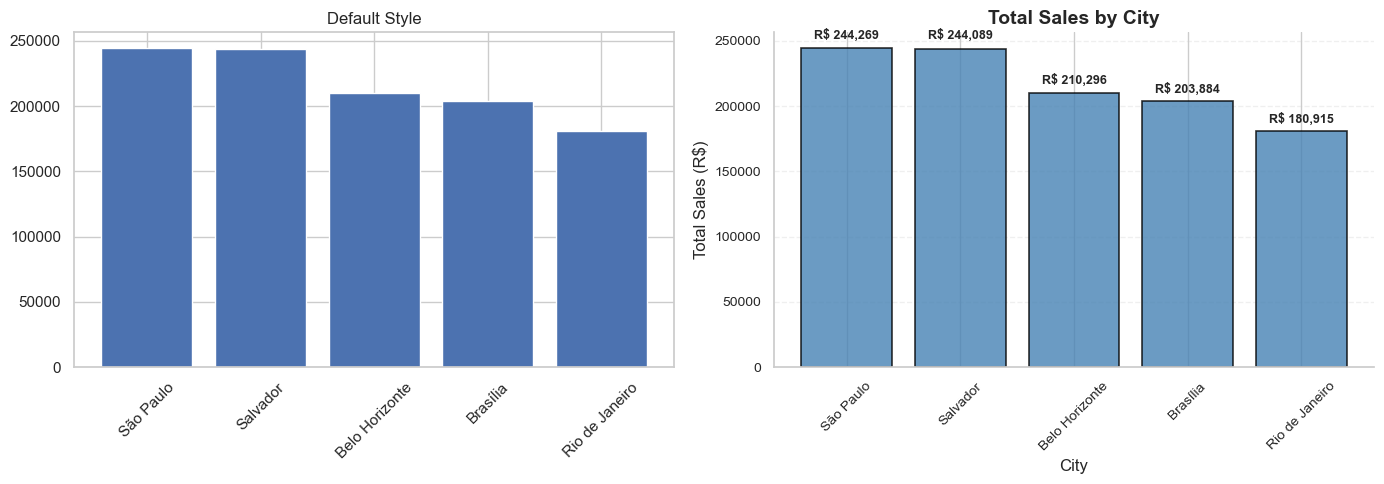


✓ Customization Tips:
   - Increase font sizes for readability
   - Add edge colors to bars for definition
   - Remove unnecessary spines
   - Add data labels when appropriate
   - Use subtle grids (alpha < 0.5)


In [46]:
# Compare default vs customized
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Default matplotlib style
city_sales = df_sales.groupby('City')['Sales'].sum().sort_values(ascending=False)
axes[0].bar(city_sales.index, city_sales.values)
axes[0].set_title('Default Style')
axes[0].tick_params(axis='x', rotation=45)

# Customized style
axes[1].bar(city_sales.index, city_sales.values, 
            color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.2)
axes[1].set_title('Total Sales by City', fontsize=14, fontweight='bold')
axes[1].set_xlabel('City', fontsize=12)
axes[1].set_ylabel('Total Sales (R$)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Add values on top of bars
for i, (city, value) in enumerate(city_sales.items()):
    axes[1].text(i, value + value*0.02, f'R$ {value:,.0f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Customization Tips:")
print("   - Increase font sizes for readability")
print("   - Add edge colors to bars for definition")
print("   - Remove unnecessary spines")
print("   - Add data labels when appropriate")
print("   - Use subtle grids (alpha < 0.5)")

## Saving Plots

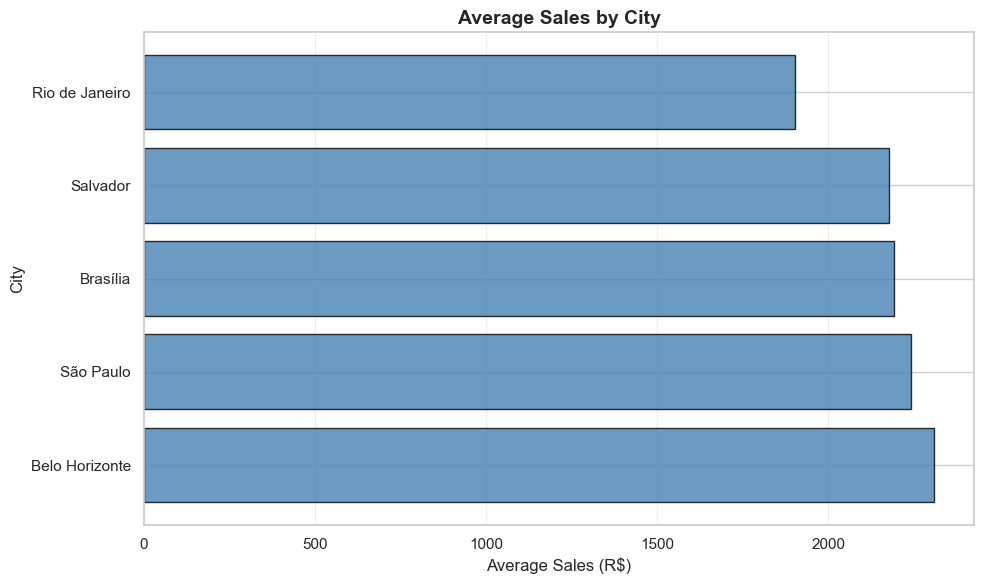


✓ Plot saved in multiple formats:
   - PNG (dpi=300): for presentations, reports
   - PDF: for publications (vector, scalable)
   - SVG: for web (vector, scalable)

✓ Use bbox_inches='tight' to avoid cutting off labels


In [48]:
# Create a nice plot
fig, ax = plt.subplots(figsize=(10, 6))

city_mean = df_sales.groupby('City')['Sales'].mean().sort_values(ascending=False)
ax.barh(city_mean.index, city_mean.values, color='steelblue', alpha=0.8, edgecolor='black')
ax.set_title('Average Sales by City', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Sales (R$)', fontsize=12)
ax.set_ylabel('City', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Save in different formats
plt.tight_layout()

# High-resolution PNG
plt.savefig('sales_by_city.png', dpi=300, bbox_inches='tight')

# PDF (vector format - best for publications)
plt.savefig('sales_by_city.pdf', bbox_inches='tight')

# SVG (vector format - good for web)
plt.savefig('sales_by_city.svg', bbox_inches='tight')

plt.show()

print("\n✓ Plot saved in multiple formats:")
print("   - PNG (dpi=300): for presentations, reports")
print("   - PDF: for publications (vector, scalable)")
print("   - SVG: for web (vector, scalable)")
print("\n✓ Use bbox_inches='tight' to avoid cutting off labels")

---
# Summary: Best Practices Checklist

## Before Sharing Any Visualization

In [49]:
print("""
╔══════════════════════════════════════════════════════════════╗
║           DATA VISUALIZATION CHECKLIST                       ║
╠══════════════════════════════════════════════════════════════╣
║                                                               ║
║  ACCURACY                                                     ║
║  ☐ Data represented truthfully                               ║
║  ☐ Y-axis starts at zero (for bar charts)                    ║
║  ☐ Appropriate scales                                        ║
║                                                               ║
║  CLARITY                                                      ║
║  ☐ Appropriate chart type for the question                   ║
║  ☐ Clear title or caption                                    ║
║  ☐ Axis labels with units                                    ║
║  ☐ Legend when using multiple series                         ║
║  ☐ Readable font sizes (≥10pt)                               ║
║                                                               ║
║  AESTHETICS                                                   ║
║  ☐ Colorblind-friendly palette                               ║
║  ☐ No chartjunk (unnecessary decorations)                    ║
║  ☐ Consistent styling                                        ║
║  ☐ Appropriate use of color                                  ║
║                                                               ║
║  AVOID                                                        ║
║  ✗ Pie charts with >5 slices                                 ║
║  ✗ 3D effects                                                 ║
║  ✗ Rainbow/jet colormap                                      ║
║  ✗ Dual Y-axes                                               ║
║  ✗ Truncated bar chart axes                                  ║
║  ✗ Too much information in one plot                          ║
║                                                               ║
╚══════════════════════════════════════════════════════════════╝
""")

print("\n🎯 KEY TAKEAWAYS:")
print("\n1. Always visualize your data - don't trust statistics alone")
print("2. Choose the right chart for your question")
print("3. Prioritize clarity over aesthetics")
print("4. Be honest with your data representation")
print("5. Use color meaningfully and accessibly")
print("6. Label everything clearly")
print("7. Remove unnecessary elements (maximize data-ink ratio)")
print("8. Test your visualization on others")
print("\n📚 Remember: Practice makes perfect!")
print("   Explore different datasets and try various visualizations.")


╔══════════════════════════════════════════════════════════════╗
║           DATA VISUALIZATION CHECKLIST                       ║
╠══════════════════════════════════════════════════════════════╣
║                                                               ║
║  ACCURACY                                                     ║
║  ☐ Data represented truthfully                               ║
║  ☐ Y-axis starts at zero (for bar charts)                    ║
║  ☐ Appropriate scales                                        ║
║                                                               ║
║  CLARITY                                                      ║
║  ☐ Appropriate chart type for the question                   ║
║  ☐ Clear title or caption                                    ║
║  ☐ Axis labels with units                                    ║
║  ☐ Legend when using multiple series                         ║
║  ☐ Readable font sizes (≥10pt)                               ║
║                   

---
# Resources for Further Learning

---
# Exercise: Create Your Own Visualization

Try creating a complete exploratory analysis of the sales data we've been using!

**Your task:**
1. Choose an interesting question about the data
2. Create appropriate visualizations to answer it
3. Follow best practices (labels, colors, appropriate chart types)
4. Write a brief interpretation

**Example questions:**
- Which product is most profitable in each city?
- How do sales patterns differ by day of the week?
- Is there a relationship between quantity sold and profit margin?
- Which city has the most consistent sales?

In [51]:
# Your code here!
# Explore the df_sales dataset and create your own visualizations

# Reminder: The dataset has these columns:
print("Available columns:")
print(df_sales.columns.tolist())

# Start exploring!


Available columns:
['Date', 'City', 'Product', 'Sales', 'Quantity', 'Cost', 'Profit', 'Month', 'Quarter', 'DayOfWeek']
